In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline

In [2]:
df = pd.read_csv('F:/Full Stack Data Science/Kaggle Projects/Comprehensive data exploration with Python/train.csv')
df.shape

(1460, 81)

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# 1. Data Analysis

# Missing values

# Method 1

# Here we will check the percentage of nan values present in each feature

In [5]:
# Step - 1 : Make the list of features which has missing values

features_with_na = [features for features in df.columns if df[features].isnull().sum()>1]

# Step 2 : Print the feature name and the percentage of missing values

for features in features_with_na:
    print(features, np.round(df[features].isnull().mean()*100, 4), '% missing values')

# Here 4 means the number of decimal points to be rounded off to

LotFrontage 17.7397 % missing values
Alley 93.7671 % missing values
MasVnrType 0.5479 % missing values
MasVnrArea 0.5479 % missing values
BsmtQual 2.5342 % missing values
BsmtCond 2.5342 % missing values
BsmtExposure 2.6027 % missing values
BsmtFinType1 2.5342 % missing values
BsmtFinType2 2.6027 % missing values
FireplaceQu 47.2603 % missing values
GarageType 5.5479 % missing values
GarageYrBlt 5.5479 % missing values
GarageFinish 5.5479 % missing values
GarageQual 5.5479 % missing values
GarageCond 5.5479 % missing values
PoolQC 99.5205 % missing values
Fence 80.7534 % missing values
MiscFeature 96.3014 % missing values


In [6]:
df['LotFrontage'].isna().mean()*100

17.73972602739726

# Since there are many missing values, we need to find the relationship between missing values and SalesPrice
# Lets plot some diagram for this relationship

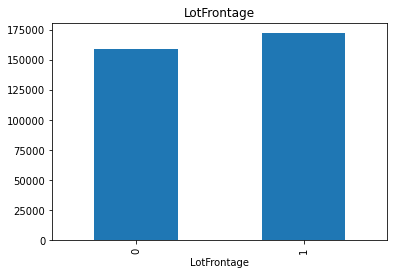

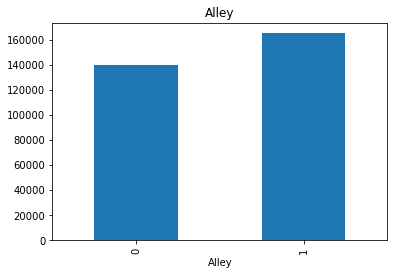

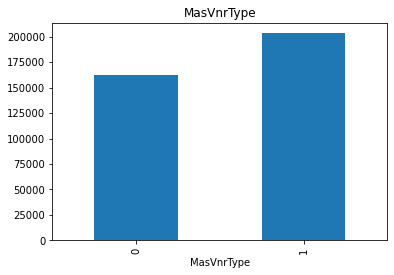

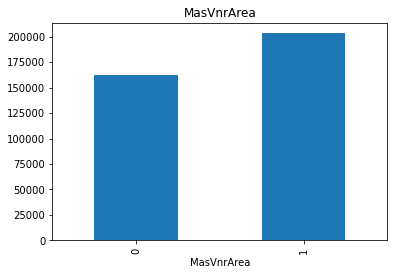

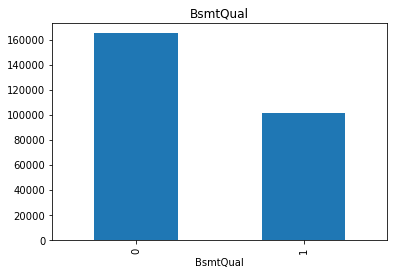

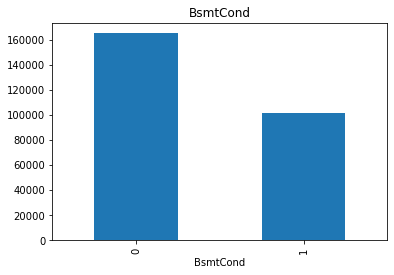

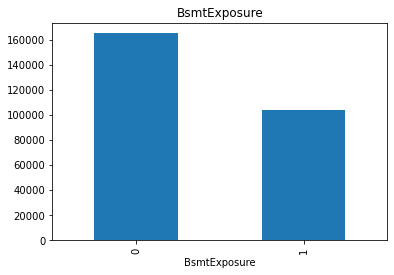

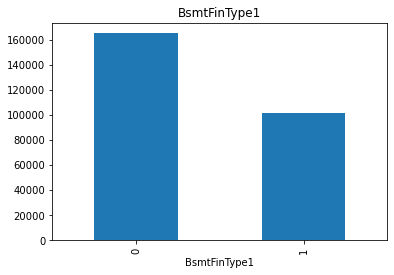

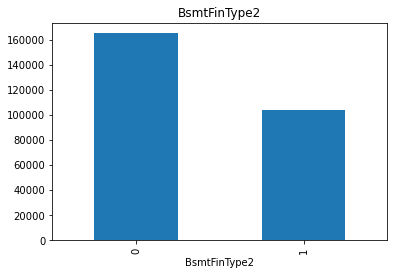

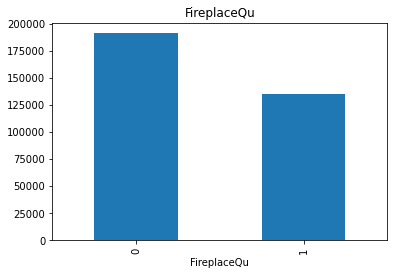

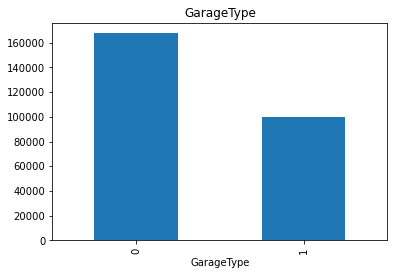

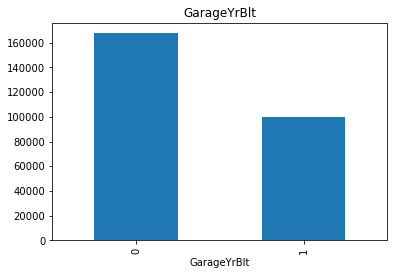

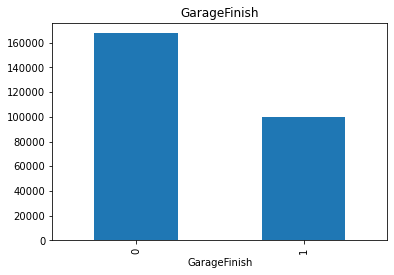

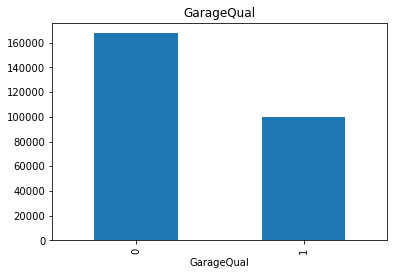

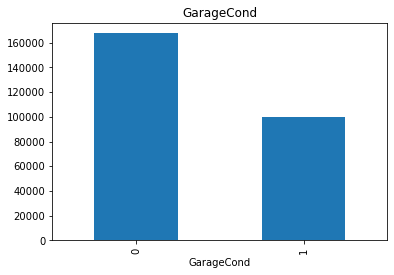

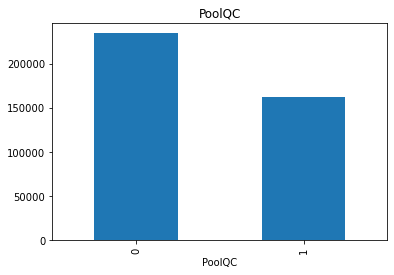

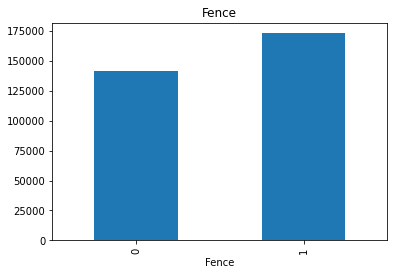

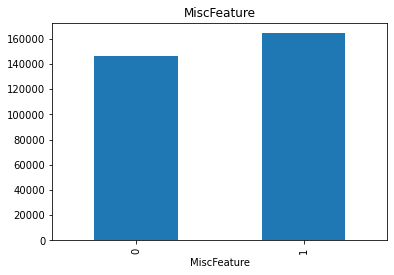

In [7]:
for feature in features_with_na:
    data = df.copy()
    
    # This variable indicates 1 if the observation is missing or 0 if present
    data[feature] = np.where( data[feature].isnull(), 1, 0)
    
    # Calculate the mean SalePrice where the observation is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

# Method 2 

# Using the library missing no

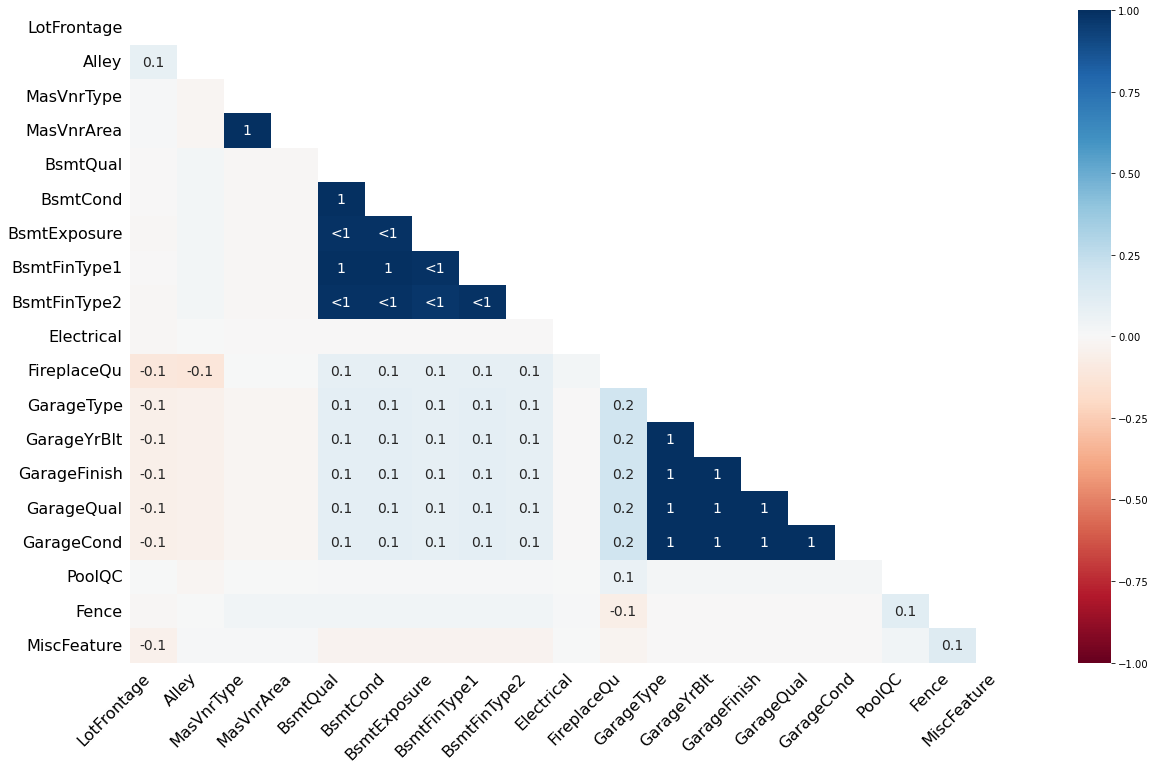

In [8]:
# Heatmap

import missingno as msno

msno.heatmap(df)
plt.show()

In [9]:
# List of numerical variables
numerical_features = [features for features in df.columns if df[features].dtype != 'O']

print('Number of Numerical Variables: ', len(numerical_features))

df[numerical_features].head()

Number of Numerical Variables:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


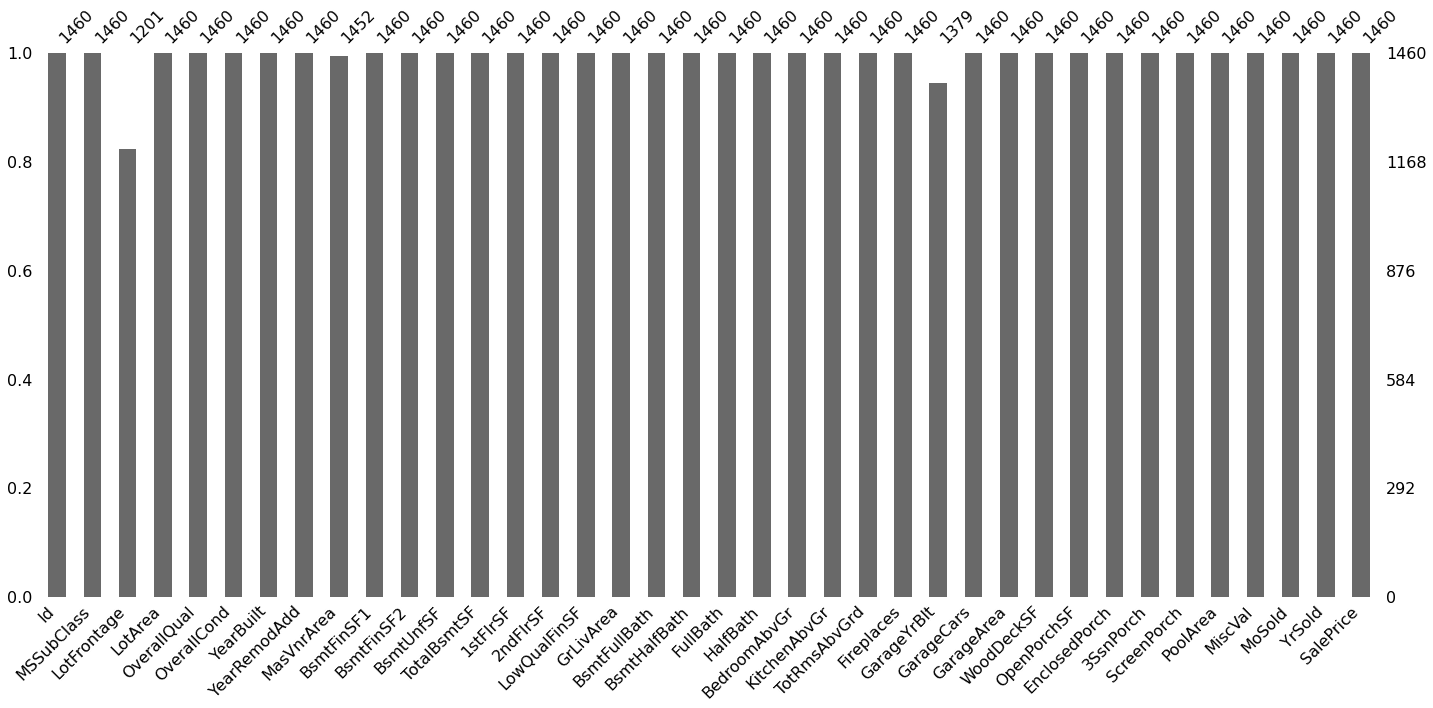

In [10]:
# Bar Graph

msno.bar(df[numerical_features])
plt.show()

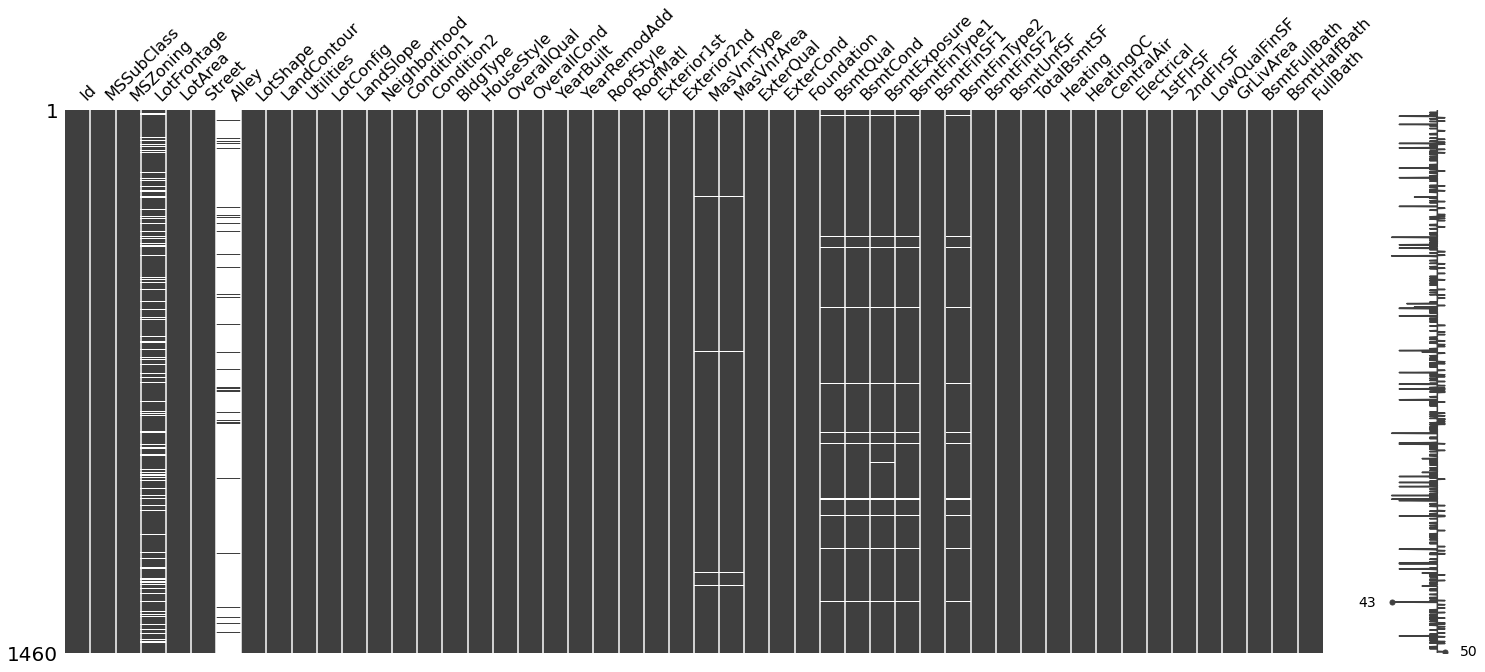

In [11]:
# Matrix

msno.matrix(df.iloc[:, 0:50])
plt.show()

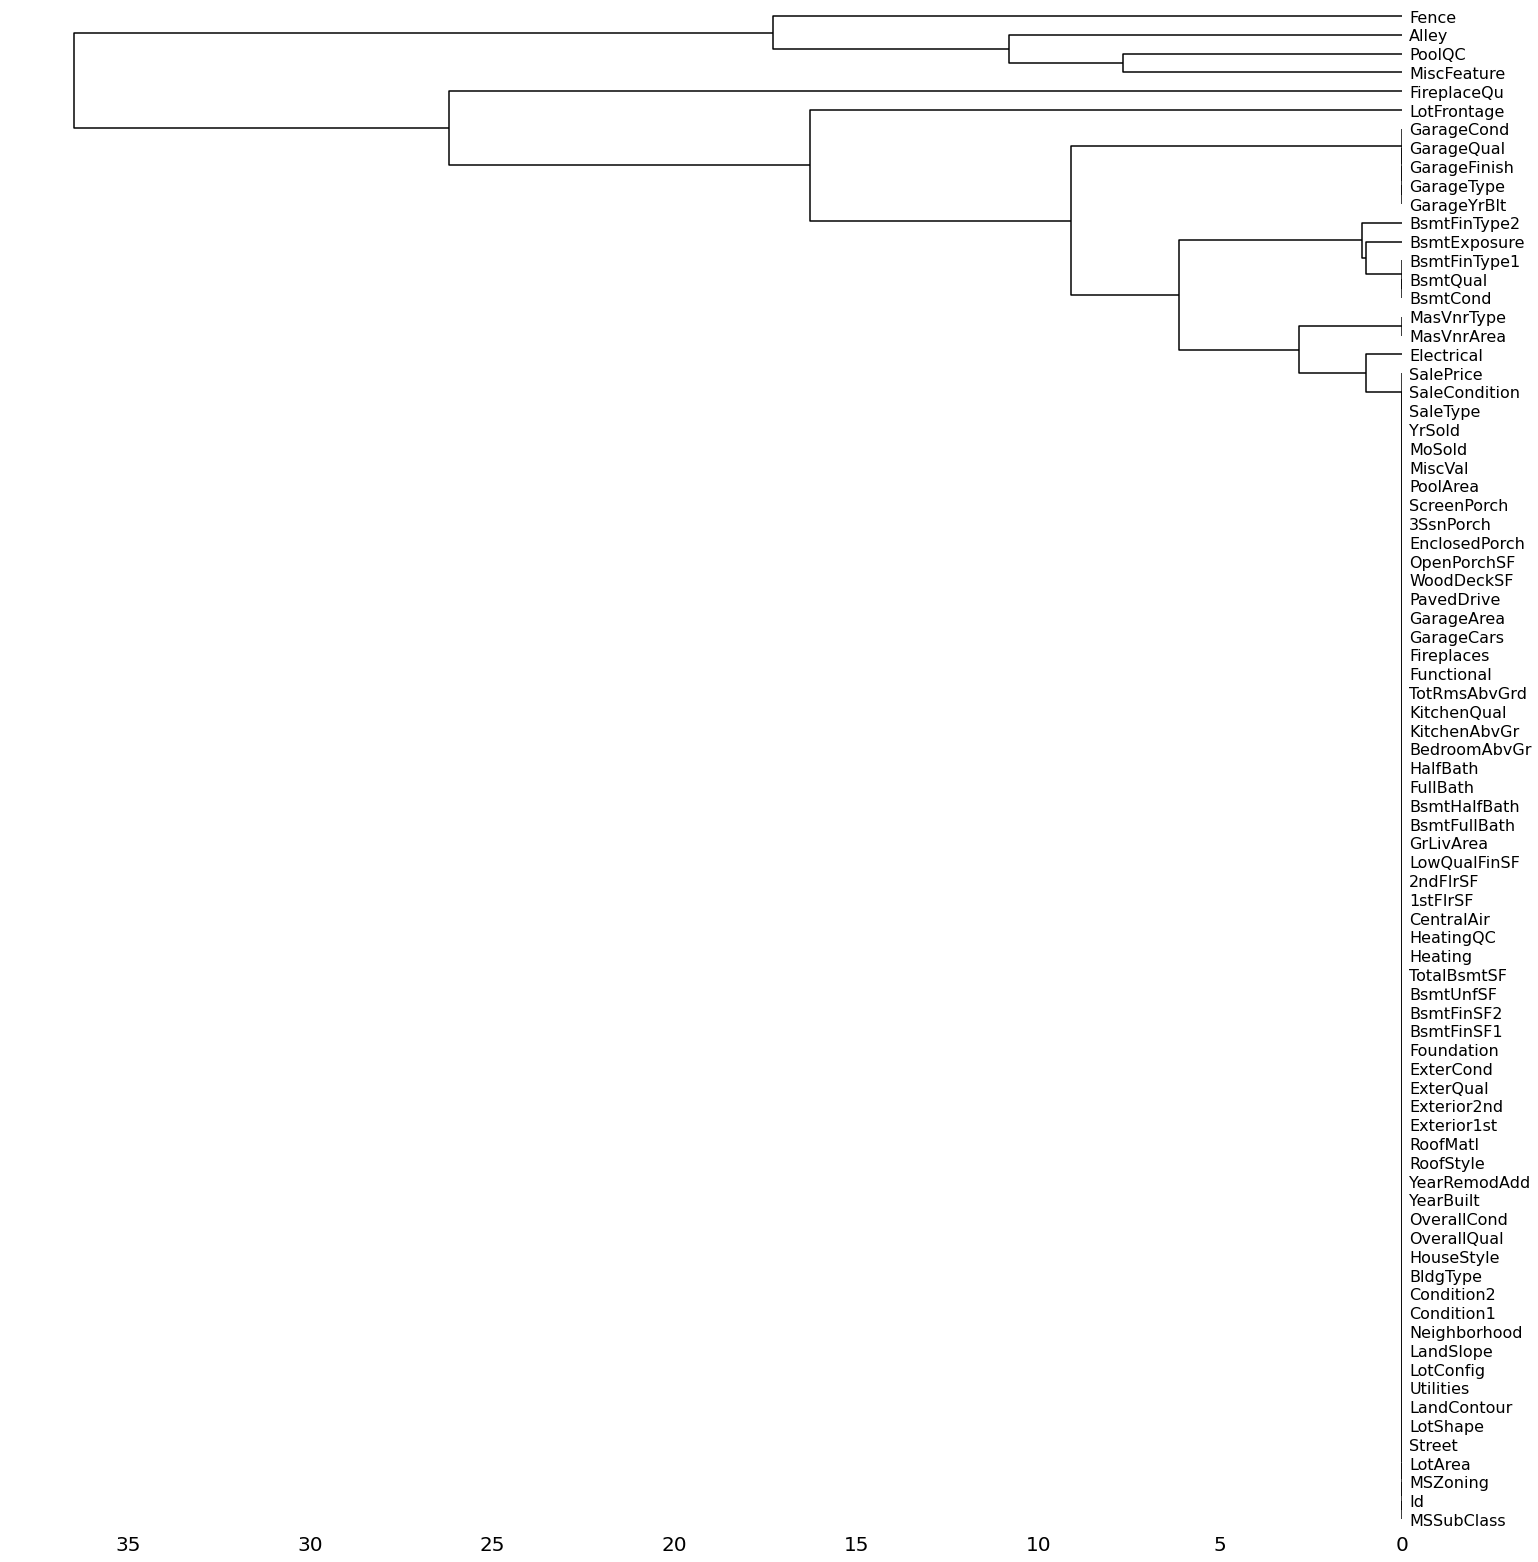

In [12]:
# Dendogram 

msno.dendrogram(df)
plt.show()

# Method 3

# Using seaborn heatmap

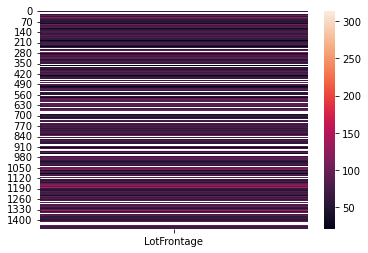

In [13]:
sns.heatmap(pd.DataFrame(df['LotFrontage']))
plt.show()

# Method 4

# Using Pandas Profiling

# We make a copy of the dataset to prevent changes in the original dataset

In [14]:
# Some of the features like Id is not required

print("Id of Houses {}".format(len(df.Id)))

Id of Houses 1460


# Numerical variables

In [15]:
# List of numerical variables
numerical_features = [features for features in df.columns if df[features].dtype != 'O']

print('Number of Numerical Variables: ', len(numerical_features))

df[numerical_features].head()

Number of Numerical Variables:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


# Temporal Variables

In [16]:
# List the variables that contain year information

year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

print('Number of Temporal Variables: ', len(year_feature))
year_feature

Number of Temporal Variables:  4


['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [17]:
# Lets explore the content of these year variables

for feature in year_feature:
    print(feature, df[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

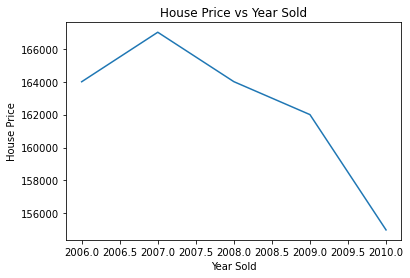

In [18]:
# Lets analyze the relationship between the temporal variables and the Saleprice
# Plot the relationship between YrSold and SalePrice

df.groupby('YrSold')['SalePrice'].median().plot()
plt.title('House Price vs Year Sold')
plt.xlabel('Year Sold')
plt.ylabel('House Price')
plt.show()

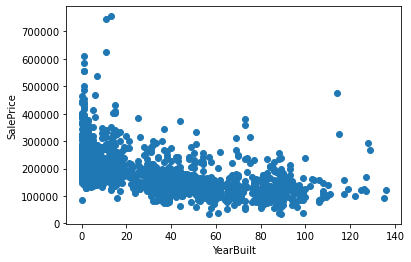

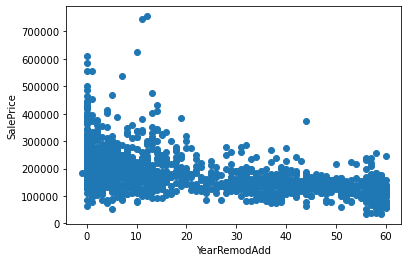

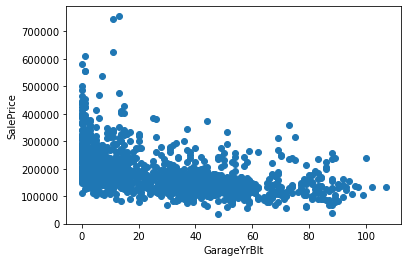

In [19]:
# Here we compare the difference between the Year sold and all other year varaibles with SalePrice
'''Example: If the year built is 1980 and the year sold is 2010, the difference is 30 years, what if the difference was 10 years,
   would the Saleprice be higher?'''
   
    
for feature in year_feature:
    if feature != 'YrSold':
        data = df.copy()
        
        # Now for the difference, replace the data in the year variables with the difference
        
        data[feature] = data['YrSold'] - data[feature]
        
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

# Discrete Variables

In [20]:
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<25 
                     and feature not in year_feature+['Id']]
print('Discrete Variables Count: ',len(discrete_features))

# Here 25 is the threshold value for discrete features

Discrete Variables Count:  17


In [21]:
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [22]:
df[discrete_features].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


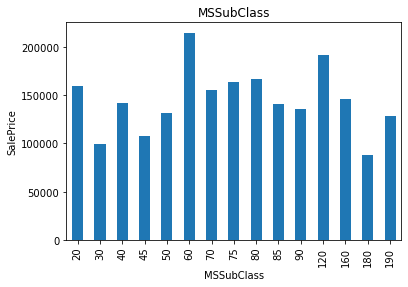

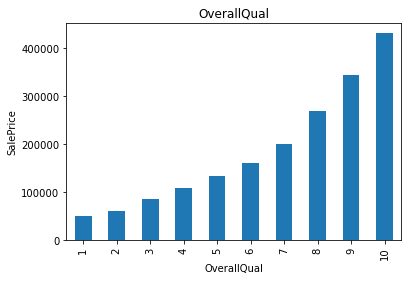

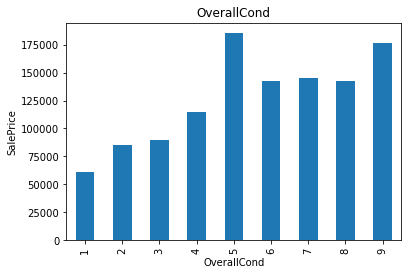

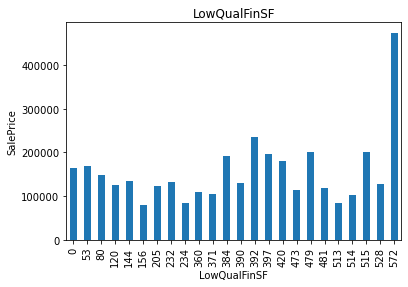

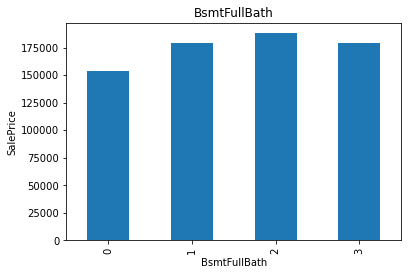

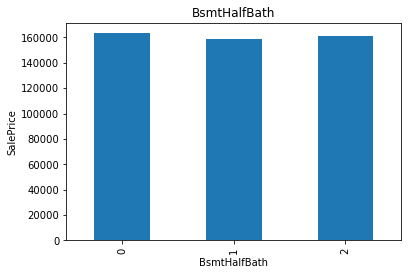

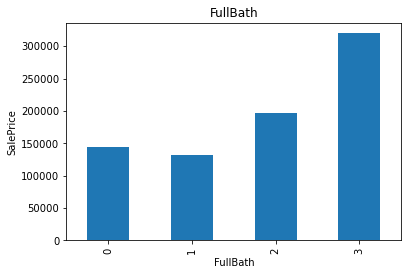

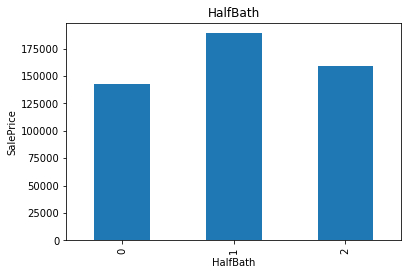

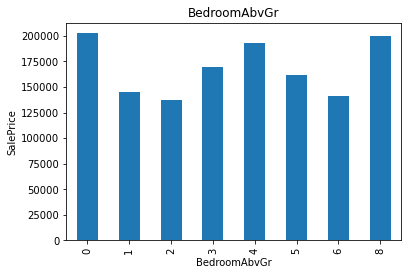

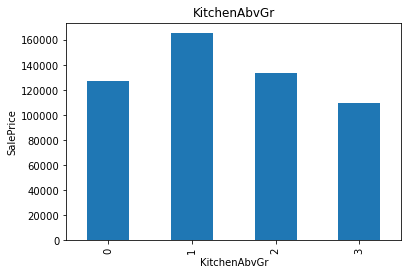

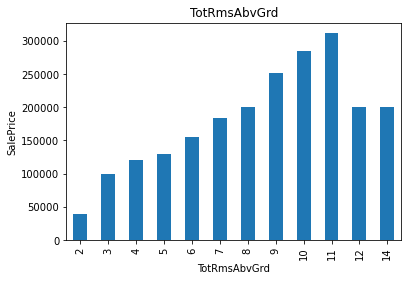

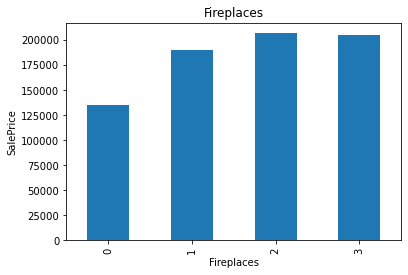

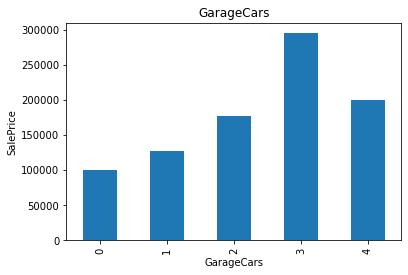

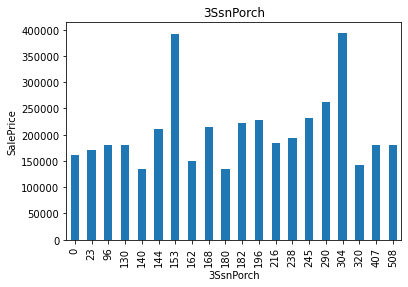

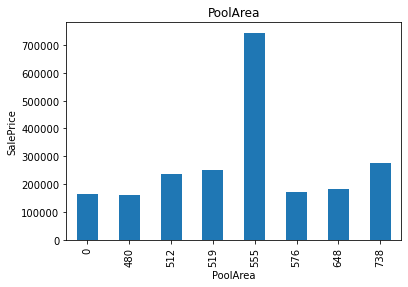

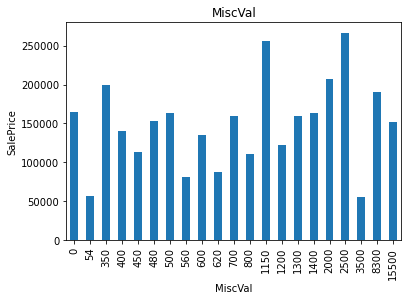

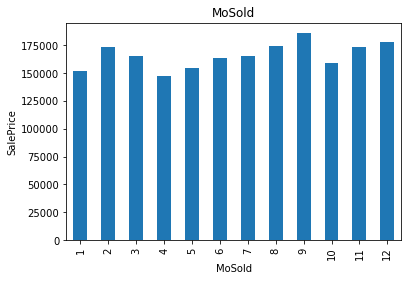

In [23]:
for feature in discrete_features:
    data = df.copy()
    
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

# Continuous Variables

In [24]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features + year_feature + ['Id']]
print('Number of Continuous Variables: ', len(continuous_features))

Number of Continuous Variables:  16


In [25]:
continuous_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [26]:
df[continuous_features].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000


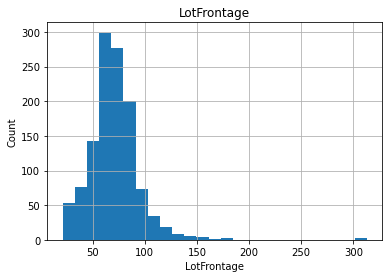

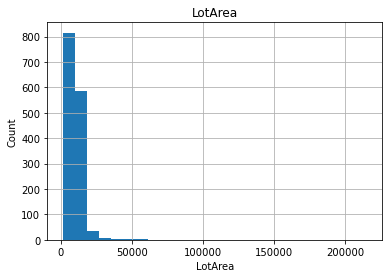

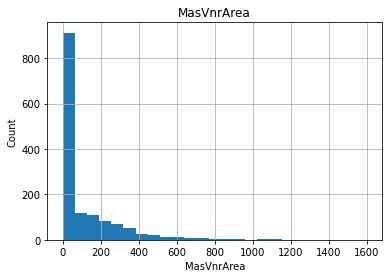

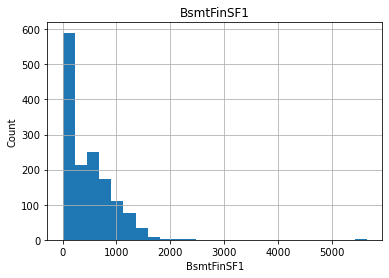

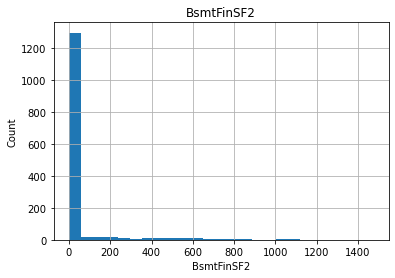

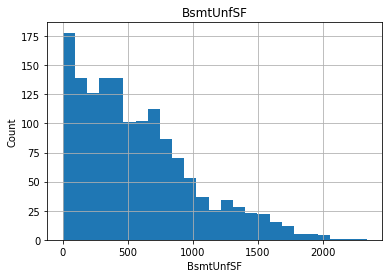

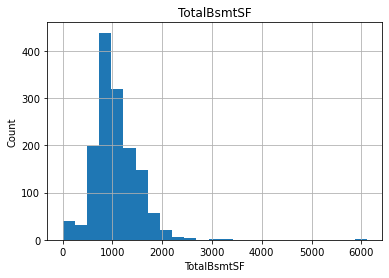

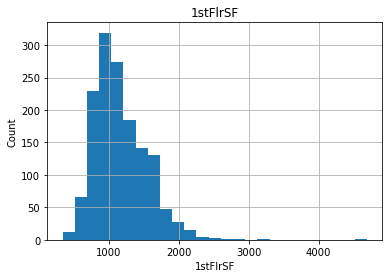

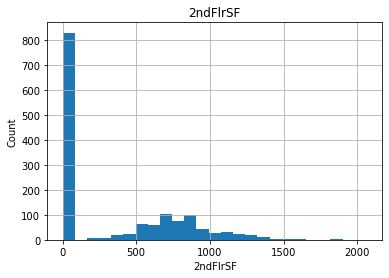

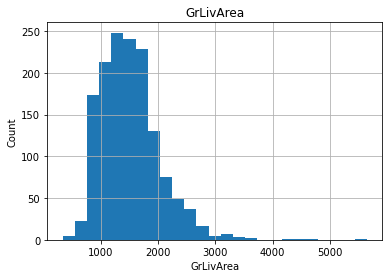

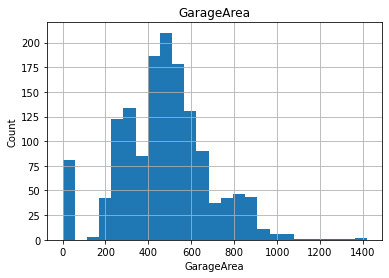

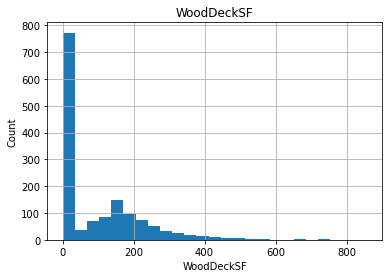

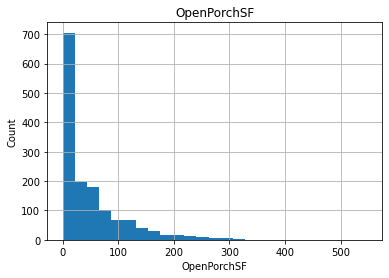

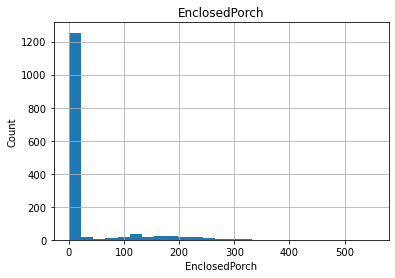

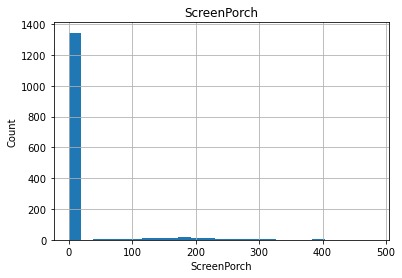

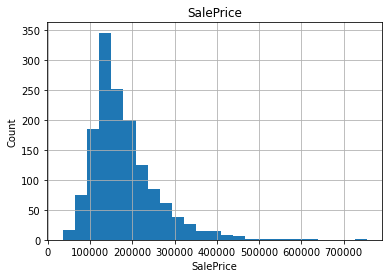

In [27]:
# Find the relationship between the continuous variables and Saleprice (dependent feature)

for feature in continuous_features:
    data = df.copy()
    
    data[feature].hist(bins = 25)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

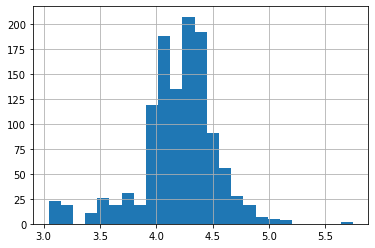

In [28]:
# Here also we are trying to do log transform

(np.log(df['LotFrontage'])).hist(bins = 25)
plt.show()

# Logarithmic Transformation

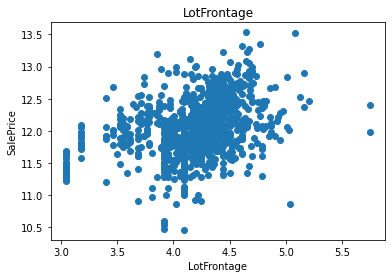

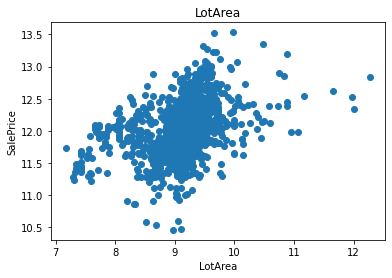

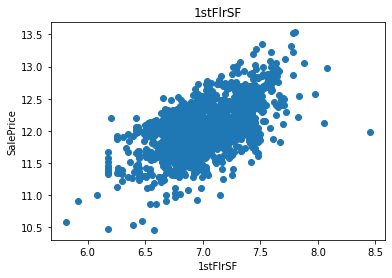

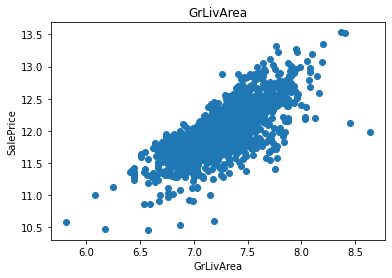

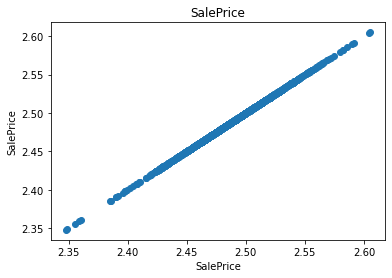

In [29]:
'''Since data is skewed, we do the logarithmic transformation. It is one of the most commonly used transformation technique to 
   convert skewed data into normal or logarithmic transformation'''

for feature in continuous_features:
    data  = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(data['SalePrice'])
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(feature)
        plt.show()

In [30]:
# We can see that most of the continuous features have a monotonic relationship

# Categorical Variables

In [31]:
categorical_features = [ feature for feature in df.columns if df[feature].dtype == 'O']

print('Number of Categorical Variables: ', len(categorical_features))

Number of Categorical Variables:  43


In [32]:
df[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [33]:
# To find the no of unique categories in each categorical variable
# Higher the no of unique values, higher is the cardinality

for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature, len(df[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 15
The feature is Exterior2nd and number of categories are 16
The feature is MasVnrType and number of cate

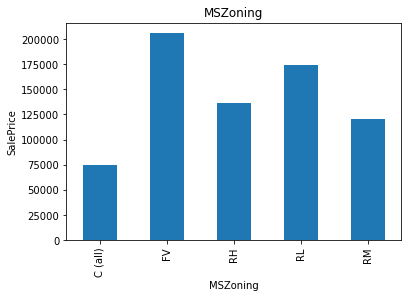

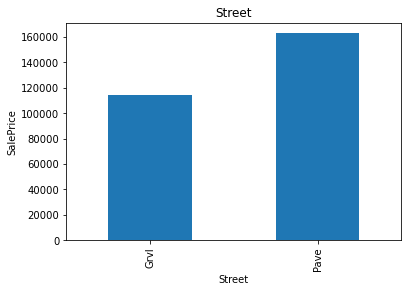

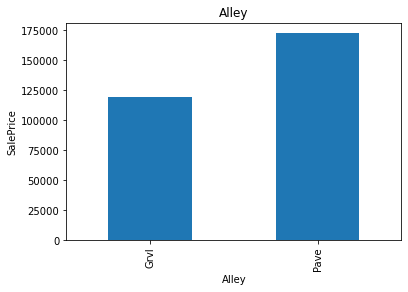

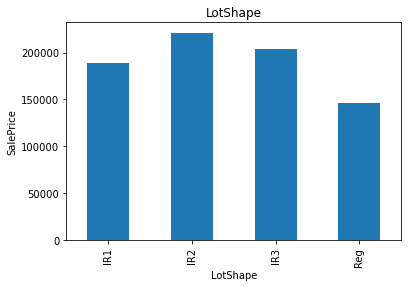

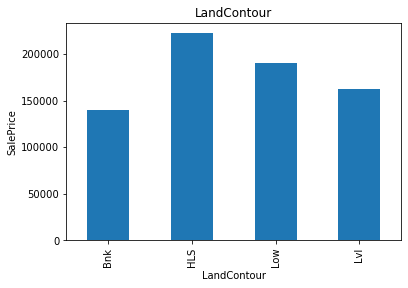

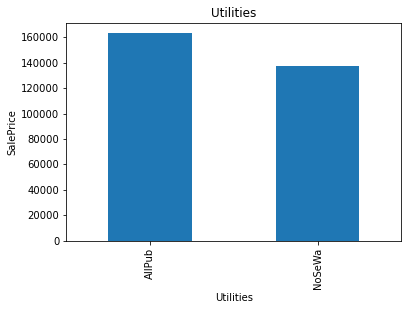

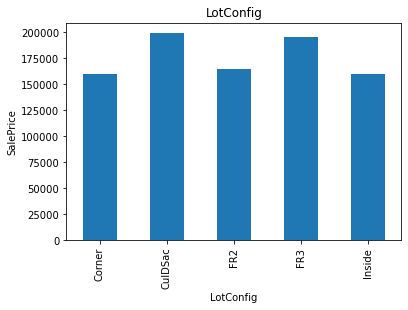

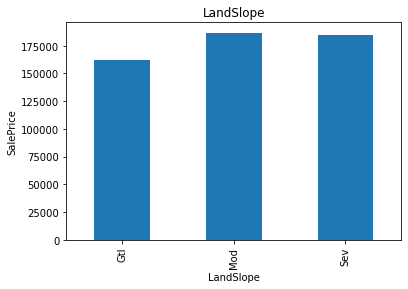

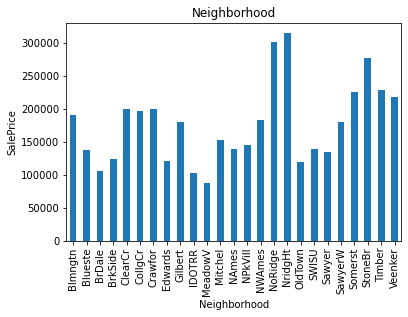

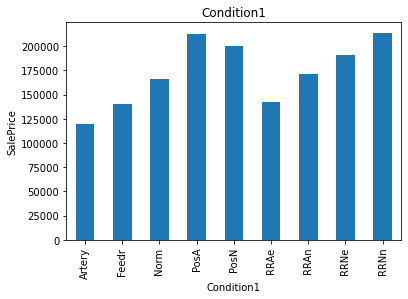

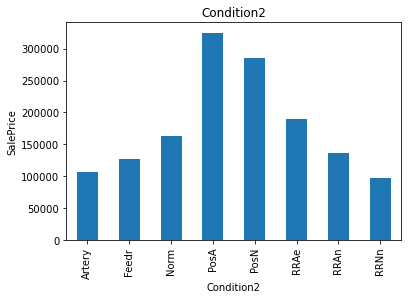

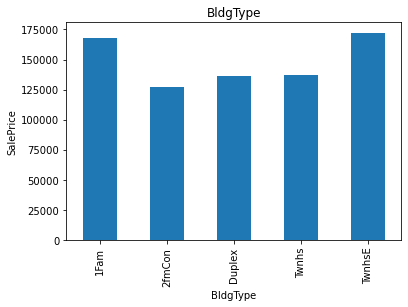

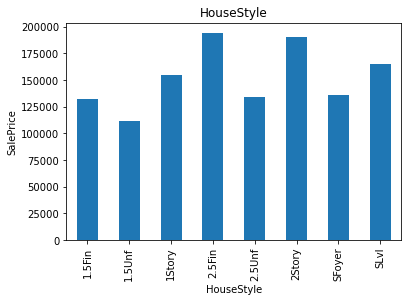

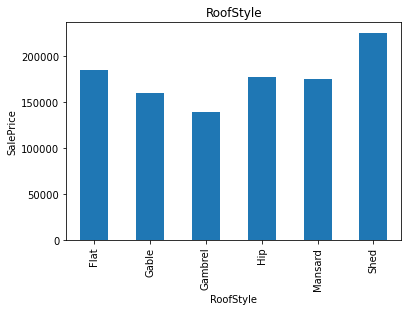

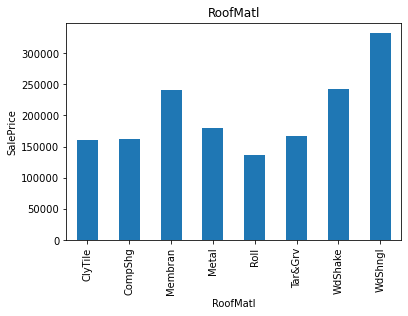

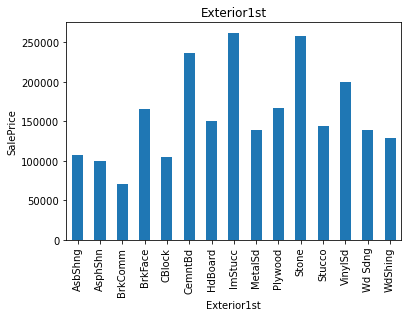

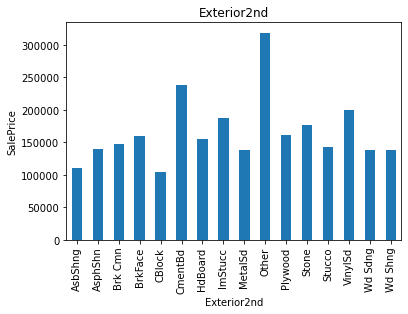

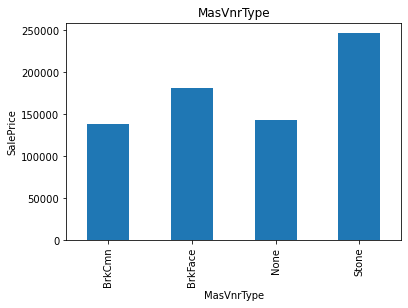

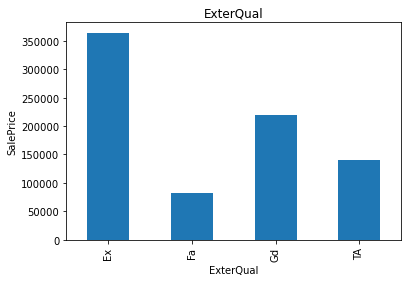

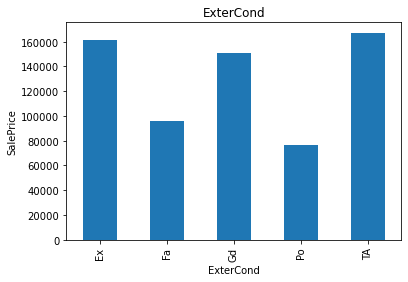

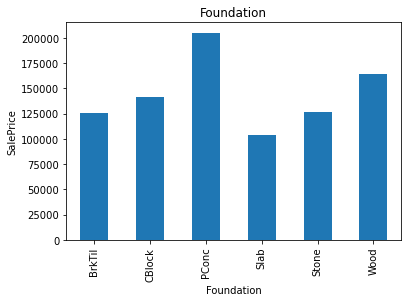

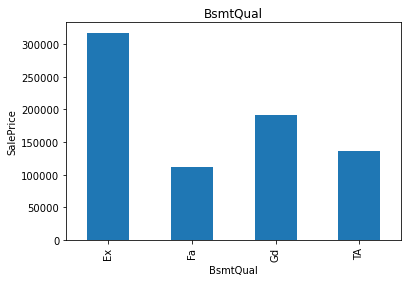

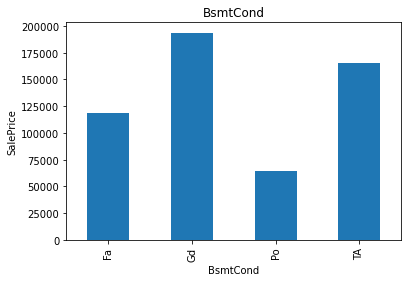

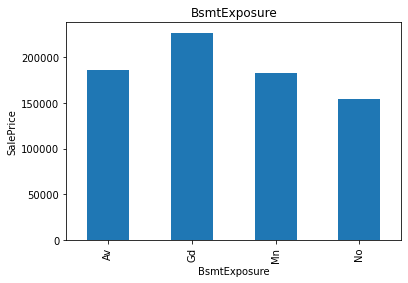

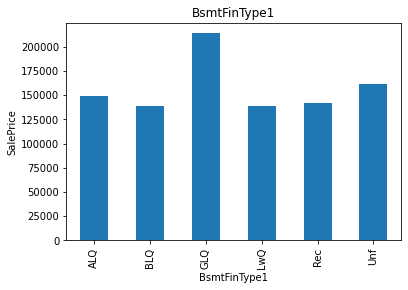

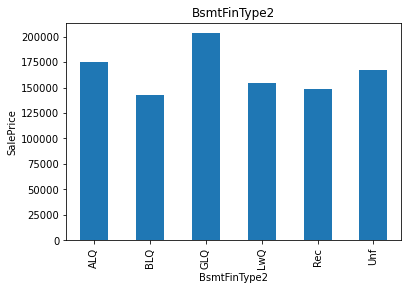

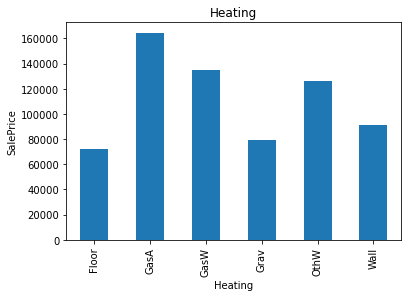

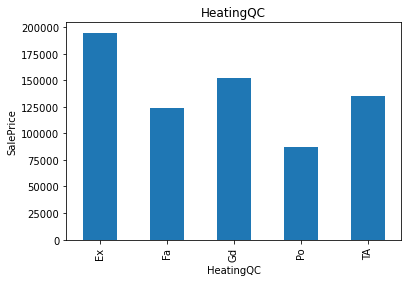

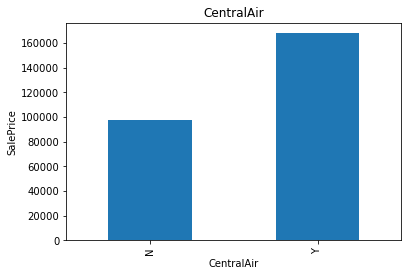

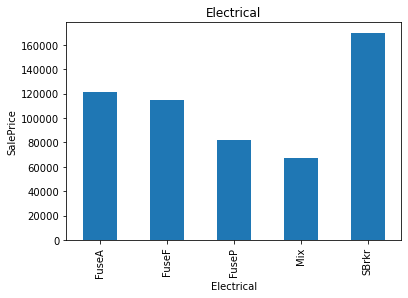

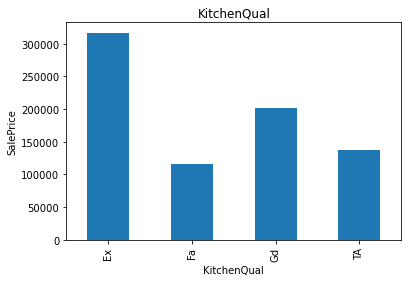

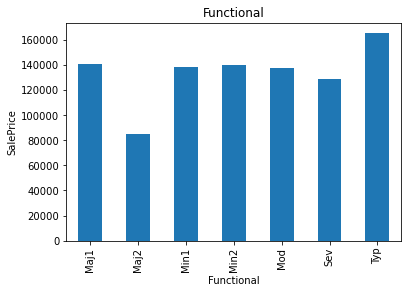

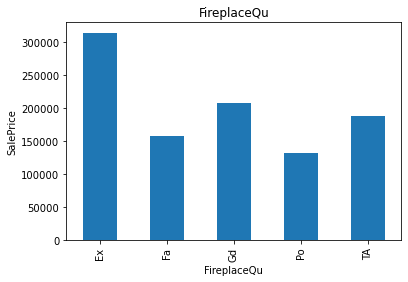

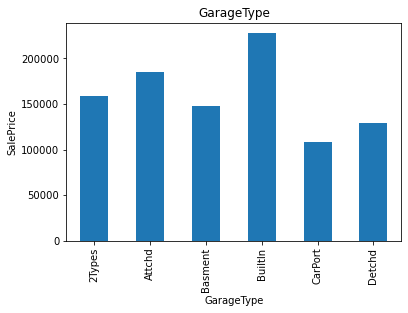

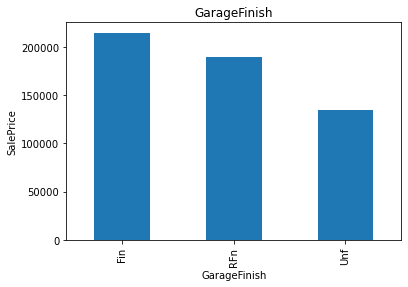

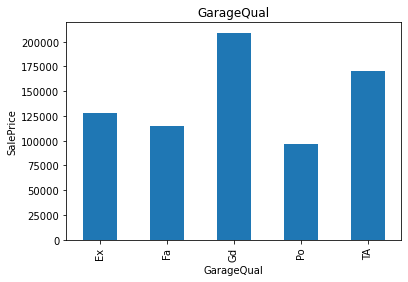

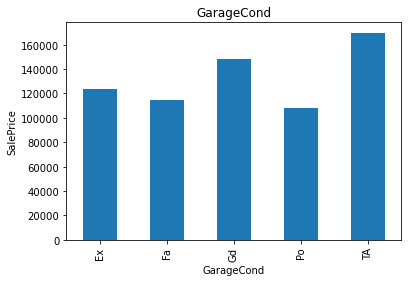

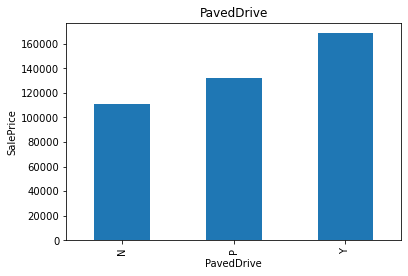

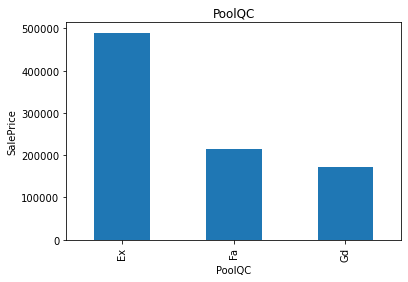

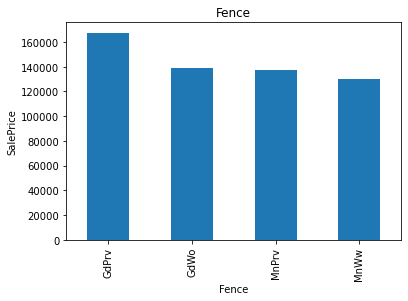

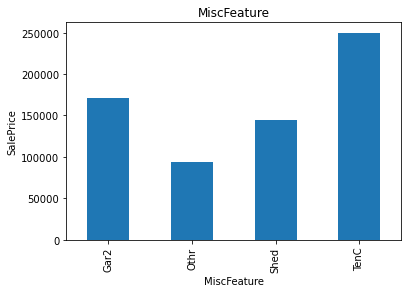

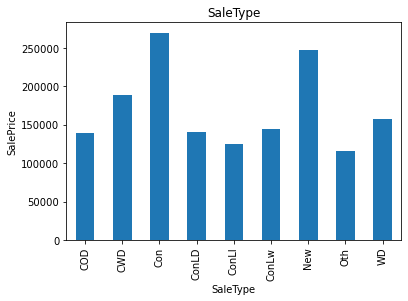

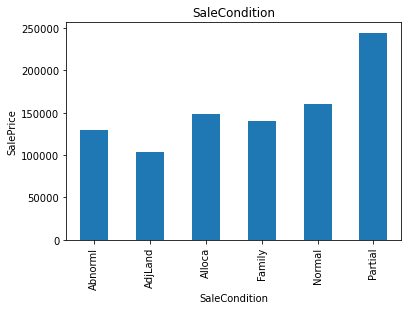

In [34]:
 # Find the relationship between categorical and dependent features

for feature in categorical_features:
    data = df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()
    
# Most of the times we consider median to plot because the dataset has a lot of outliers

# 2. Feature Engineering

# Handling Missing Values

# Method 1 - Deleting the columns with missing data

Delete those columns which have more than 75 percent of missing values

In [35]:
features_with_na = [features for features in df.columns if df[features].isnull().sum()>1]

for features in features_with_na:
    print(features, np.round(df[features].isnull().mean()*100, 4), '% missing values')

LotFrontage 17.7397 % missing values
Alley 93.7671 % missing values
MasVnrType 0.5479 % missing values
MasVnrArea 0.5479 % missing values
BsmtQual 2.5342 % missing values
BsmtCond 2.5342 % missing values
BsmtExposure 2.6027 % missing values
BsmtFinType1 2.5342 % missing values
BsmtFinType2 2.6027 % missing values
FireplaceQu 47.2603 % missing values
GarageType 5.5479 % missing values
GarageYrBlt 5.5479 % missing values
GarageFinish 5.5479 % missing values
GarageQual 5.5479 % missing values
GarageCond 5.5479 % missing values
PoolQC 99.5205 % missing values
Fence 80.7534 % missing values
MiscFeature 96.3014 % missing values


In [36]:
df = df.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'])
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


# Method 2 - Deleting the rows with missing data

# First technique to delete rows with missing data 

'''Here, we are selecting only two columns for demonstration : MasVnrType 0.5479 % missing values, 
   MasVnrArea 0.5479 % missing values'''

In [37]:
data = df.copy()
data.shape

(1460, 77)

In [38]:
data['MasVnrType'].isnull().sum()

8

In [39]:
data['MasVnrArea'].isnull().sum()

8

In [40]:
data_no_missing = data.loc[(df['MasVnrType'].notnull()) & (df['MasVnrArea'].notnull())]
data_no_missing.shape

(1452, 77)

# Second technique to delete rows with missing data 

In [41]:
data = df.copy()
data.shape

(1460, 77)

In [42]:
data_updated = data.dropna(axis = 0, how = 'any')

In [43]:
data_updated.shape

(583, 77)

In [44]:
# The above code is only for reference
# Deleting rows using this technique reduces the no of rows drastically

# Method 2 - Imputation

# A. Handle missing values in categorical variables

In [45]:
cat_feature_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtype == 'O']

for feature in cat_feature_nan:
    print('{} : {}% missing values'.format(feature, np.round(df[feature].isnull().mean()*100), 4))

MasVnrType : 1.0% missing values
BsmtQual : 3.0% missing values
BsmtCond : 3.0% missing values
BsmtExposure : 3.0% missing values
BsmtFinType1 : 3.0% missing values
BsmtFinType2 : 3.0% missing values
FireplaceQu : 47.0% missing values
GarageType : 6.0% missing values
GarageFinish : 6.0% missing values
GarageQual : 6.0% missing values
GarageCond : 6.0% missing values


# First Technique: Replace the missing value in the categorical variables with a new label

In [46]:
def replace_cat_features(df, cat_feature_nan):
    data = df.copy()
    data[cat_feature_nan] = data[cat_feature_nan].fillna('Missing')
    return data

In [47]:
data = df.copy()
data = replace_cat_features(data, cat_feature_nan)
data[cat_feature_nan].head(20)

,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond
0,BrkFace,Gd,TA,No,GLQ,Unf,Missing,Attchd,RFn,TA,TA
1,None,Gd,TA,Gd,ALQ,Unf,TA,Attchd,RFn,TA,TA
2,BrkFace,Gd,TA,Mn,GLQ,Unf,TA,Attchd,RFn,TA,TA
3,None,TA,Gd,No,ALQ,Unf,Gd,Detchd,Unf,TA,TA
4,BrkFace,Gd,TA,Av,GLQ,Unf,TA,Attchd,RFn,TA,TA
5,None,Gd,TA,No,GLQ,Unf,Missing,Attchd,Unf,TA,TA
6,Stone,Ex,TA,Av,GLQ,Unf,Gd,Attchd,RFn,TA,TA
7,Stone,Gd,TA,Mn,ALQ,BLQ,TA,Attchd,RFn,TA,TA
8,None,TA,TA,No,Unf,Unf,TA,Detchd,Unf,Fa,TA
9,None,TA,TA,No,GLQ,Unf,TA,Attchd,RFn,Gd,TA


In [48]:
# Now check if all the nan values are replaced by calling the function

In [49]:
data[cat_feature_nan].isnull().sum()

MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

# Second Technique: Replace the missing value in the categorical variables with its mode value (most frequent value)

In [50]:
data = df.copy()

<AxesSubplot:>

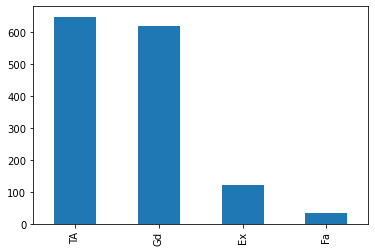

In [51]:
data['BsmtQual'].value_counts().plot.bar()

<AxesSubplot:xlabel='BsmtQual'>

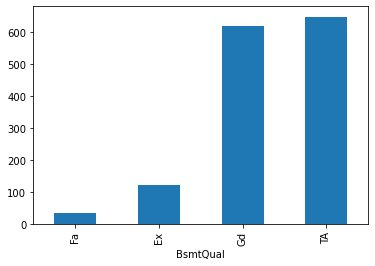

In [52]:
data.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending = True).plot.bar()

In [53]:
data['GarageType'].value_counts().index[0]

'Attchd'

In [54]:
data['GarageType'].mode()[0]

'Attchd'

In [55]:
def impute_most_frequent(df, variable):
    most_frequent_category = data[variable].mode()[0]
    df[variable].fillna(most_frequent_category, inplace = True)

In [56]:
impute_most_frequent(data, 'BsmtQual')

In [57]:
data['BsmtQual'].head(20)

# 17th observation was a missing value and is now filled with the most frequent value i.e, TA

0     Gd
1     Gd
2     Gd
3     TA
4     Gd
5     Gd
6     Ex
7     Gd
8     TA
9     TA
10    TA
11    Ex
12    TA
13    Gd
14    TA
15    TA
16    TA
17    TA
18    TA
19    TA
Name: BsmtQual, dtype: object

In [58]:
# Using the above function in a loop

data = df.copy()

for feature in cat_feature_nan:
    impute_most_frequent(data, feature)

data[cat_feature_nan].head(20)

,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond
0,BrkFace,Gd,TA,No,GLQ,Unf,Gd,Attchd,RFn,TA,TA
1,None,Gd,TA,Gd,ALQ,Unf,TA,Attchd,RFn,TA,TA
2,BrkFace,Gd,TA,Mn,GLQ,Unf,TA,Attchd,RFn,TA,TA
3,None,TA,Gd,No,ALQ,Unf,Gd,Detchd,Unf,TA,TA
4,BrkFace,Gd,TA,Av,GLQ,Unf,TA,Attchd,RFn,TA,TA
5,None,Gd,TA,No,GLQ,Unf,Gd,Attchd,Unf,TA,TA
6,Stone,Ex,TA,Av,GLQ,Unf,Gd,Attchd,RFn,TA,TA
7,Stone,Gd,TA,Mn,ALQ,BLQ,TA,Attchd,RFn,TA,TA
8,None,TA,TA,No,Unf,Unf,TA,Detchd,Unf,Fa,TA
9,None,TA,TA,No,GLQ,Unf,TA,Attchd,RFn,Gd,TA


In [59]:
data[cat_feature_nan].isnull().sum()

MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

# B. Handling missing values in numerical variables

In [60]:
num_feature_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtype != 'O']

for feature in num_feature_nan:
    print('{} : {}% missing values'.format(feature, np.round(df[feature].isnull().mean()*100, 4)))

LotFrontage : 17.7397% missing values
MasVnrArea : 0.5479% missing values
GarageYrBlt : 5.5479% missing values


# Replace the numerical missing values with mean or median values

In [61]:
data = df.copy()
for feature in num_feature_nan:
    median_value = data[feature].median()
    
    
    data[feature+'nan'] = np.where(data[feature].isnull(), 1, 0)
    data[feature].fillna(median_value, inplace=True)

In [62]:
data[num_feature_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [63]:
data.head(10)

# 69 is the median value in the column LotFrontage and index no 7 is replaced with 69
# Notice that three more columns are added, i.e, the nan columns

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,12,2008,WD,Normal,250000,0,0,0
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,700,10,2009,WD,Normal,143000,0,0,0
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,8,2007,WD,Normal,307000,0,0,0
7,8,60,RL,69.0,10382,Pave,IR1,Lvl,AllPub,Corner,...,0,350,11,2009,WD,Normal,200000,1,0,0
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,0,0,4,2008,WD,Abnorml,129900,0,0,0
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,1,2008,WD,Normal,118000,0,0,0


# Filling Nan with pad/pfill (Forward Fill) and bfill/backfill (Backward Fill) methods

In [64]:
def impute_NaN(df, variable):
    df[variable+'_pfill'] = df[variable].fillna(method = 'pad')
    df[variable+'_bfill'] = df[variable].fillna(method = 'backfill')

In [65]:
data = df.copy()
impute_NaN(data, 'LotFrontage')

In [66]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_pfill,LotFrontage_bfill
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,2,2008,WD,Normal,208500,65.0,65.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,5,2007,WD,Normal,181500,80.0,80.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,9,2008,WD,Normal,223500,68.0,68.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,2,2006,WD,Abnorml,140000,60.0,60.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,12,2008,WD,Normal,250000,84.0,84.0
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,0,700,10,2009,WD,Normal,143000,85.0,85.0
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,8,2007,WD,Normal,307000,75.0,75.0
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,...,0,0,350,11,2009,WD,Normal,200000,75.0,51.0
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,4,2008,WD,Abnorml,129900,51.0,51.0
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,1,2008,WD,Normal,118000,50.0,50.0


In [67]:
# See last two columns, where the 7th observation is filled

# When data is Missing Completely at Random

# Random Sample Imputation 

Random Sample Imputation takes a random observation from the feature.
After that we use random observation to replace NaN in that feature.
It should be used when data is missing completely at random (MCAR)

In [68]:
data = df.copy()

In [69]:
data['LotFrontage'].isnull().sum()

259

In [70]:
data['LotFrontage'].dropna().sample()

771    67.0
Name: LotFrontage, dtype: float64

In [71]:
data['LotFrontage'].dropna().sample(data['LotFrontage'].isnull().sum(), random_state=0)

# This function check where is null values are present and replace Nan with random sample
#''We use random_state because it replace NaN with specific value only ( if we not use random_state then values change evrytime when we run)

242      63.0
400      38.0
54       60.0
316      94.0
748      59.0
        ...  
377     102.0
1279     60.0
1397     51.0
146      51.0
820      72.0
Name: LotFrontage, Length: 259, dtype: float64

In [72]:
data[data['LotFrontage'].isnull()].index

# This line of code return a index where LotFrontage is NaN

Int64Index([   7,   12,   14,   16,   24,   31,   42,   43,   50,   64,
            ...
            1407, 1417, 1419, 1423, 1424, 1429, 1431, 1441, 1443, 1446],
           dtype='int64', length=259)

In [73]:
def random_sample_impute(df, variable):
    
    #Copy the feature into a new feature
    df[variable+'_random'] = df[variable]
    
    #In random_sample. all filled nan values are present, now we want to put/merge this all filled values in our dataset
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state = 0)
    
    # To do this we will have to match all nan values's index in random_sample with df[variable+'_random'] 
    #Pandas need to have same index in order to merge dataset
    random_sample.index = df[df[variable].isnull()].index
    
    #Now put a condition where ever it is null with loc function then replace with random_sample
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample

In [74]:
random_sample_impute(data, 'LotFrontage')

In [75]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_random
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,208500,65.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,2007,WD,Normal,181500,80.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,223500,68.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,2,2006,WD,Abnorml,140000,60.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,250000,84.0
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,320,0,0,700,10,2009,WD,Normal,143000,85.0
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,8,2007,WD,Normal,307000,75.0
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,350,11,2009,WD,Normal,200000,63.0
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,4,2008,WD,Abnorml,129900,51.0
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,1,2008,WD,Normal,118000,50.0


In [76]:
# To compare the median filling technique with random sample imputation

data1 = df.copy()
median = data1['LotFrontage'].median()
data1['LotFrontage'+'_median'] = data1['LotFrontage'].fillna(median)
data1.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_median
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,208500,65.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,2007,WD,Normal,181500,80.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,223500,68.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,2,2006,WD,Abnorml,140000,60.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,250000,84.0
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,320,0,0,700,10,2009,WD,Normal,143000,85.0
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,8,2007,WD,Normal,307000,75.0
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,350,11,2009,WD,Normal,200000,69.0
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,4,2008,WD,Abnorml,129900,51.0
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,1,2008,WD,Normal,118000,50.0


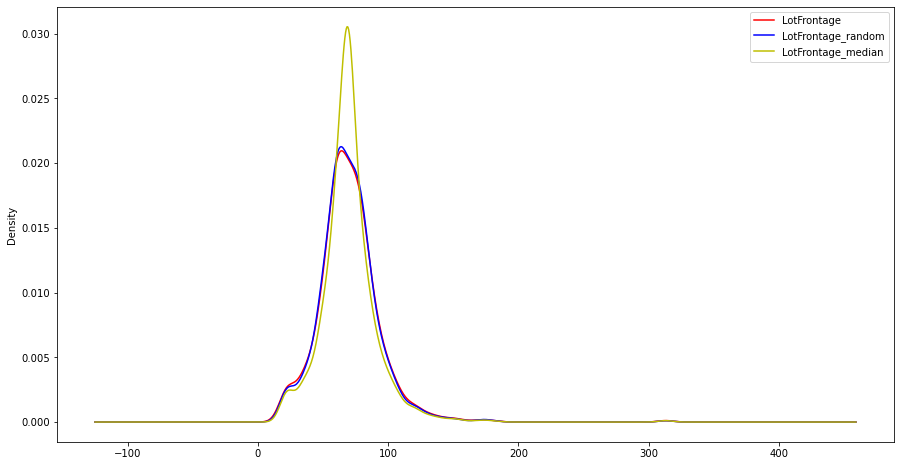

In [77]:
# Plotting the comparison

plt.figure(figsize=(15,8))
data.LotFrontage.plot(kind = 'kde', color = 'r')
data.LotFrontage_random.plot(kind = 'kde', color = 'b')
data1.LotFrontage_median.plot(kind = 'kde', color = 'y')
plt.legend()
plt.show()

In [78]:
# From plot we can say that Random Sample Imputation work better than Mean Median Mode imputation is some cases.
# When we use Median to fillna there is Distortion
# There is Less distortion in random sample
# In every cases random sample imputation wont work

Do Random Sample Imputation for FireplaceQu

# Imputation with an additional column 

It works well if the data are not missing completely at random

# Method 1

In [79]:
data = df.copy()

data['LotFrontage'+'_NaN'] = np.where(data['LotFrontage'].isnull(), 1, 0)

data.head(10)

# an extra feature is added at the end

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_NaN
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,208500,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,2007,WD,Normal,181500,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,223500,0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,2,2006,WD,Abnorml,140000,0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,250000,0
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,320,0,0,700,10,2009,WD,Normal,143000,0
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,8,2007,WD,Normal,307000,0
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,350,11,2009,WD,Normal,200000,1
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,4,2008,WD,Abnorml,129900,0
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,1,2008,WD,Normal,118000,0


In [80]:
data['LotFrontage_NaN'].value_counts()

0    1201
1     259
Name: LotFrontage_NaN, dtype: int64

# Method 2

In [81]:
from sklearn.impute import SimpleImputer

data = df.copy()

data['LotFrontage_missing'] = data['LotFrontage'].isnull()

my_imputer = SimpleImputer(strategy= 'median')
# Strategy may be median, mean or mode

data['LotFrontage'] = my_imputer.fit_transform(pd.DataFrame(data['LotFrontage']))

data.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_missing
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,208500,False
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,2007,WD,Normal,181500,False
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,223500,False
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,2,2006,WD,Abnorml,140000,False
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,250000,False
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,320,0,0,700,10,2009,WD,Normal,143000,False
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,8,2007,WD,Normal,307000,False
7,8,60,RL,69.0,10382,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,350,11,2009,WD,Normal,200000,True
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,4,2008,WD,Abnorml,129900,False
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,1,2008,WD,Normal,118000,False


# KNN Imputer Method

According scikit-learn docs: Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set. Two samples are close if the features that neither is missing are close. By default, a euclidean distance metric that supports missing values, nan_euclidean_distances, is used to find the nearest neighbors.

In [82]:
data = df.copy()

from sklearn.impute import KNNImputer

my_imputer = KNNImputer(n_neighbors=2)
data[num_feature_nan] = my_imputer.fit_transform(data[num_feature_nan])

data[num_feature_nan].head(20)

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0
5,85.0,0.0,1993.0
6,75.0,186.0,2004.0
7,21.0,240.0,1973.0
8,51.0,0.0,1931.0
9,50.0,0.0,1939.0


# End of Distribution Imputation 

If there is suspicion that the missing value is not at random then capturing that information is important. In this scenario, one would want to replace missing data with values that are at the tails of the distribution of the variable. The advantage is that it is quick and captures the importance of missing values (if one suspects the missing data is valuable). On the flipside, performing this action may distort the variable, mask predictive power if missingness is not important, hide true outliers if the missing data is large or create an unintended outlier if N/As are small.  Once again, this method should be performed on the training set and propagated on the test set.  Since we know “LotFrontage” follows a normal distribution, outliers will be computed using the mean rather than the median.

In [83]:
data = df.copy()

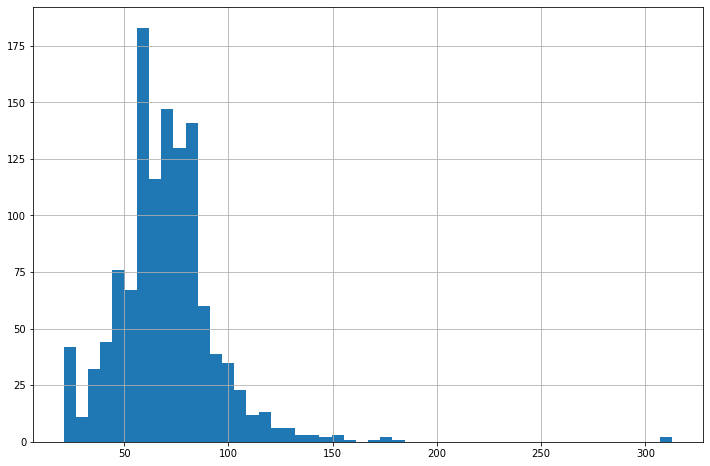

In [84]:
plt.figure(figsize=(12,8))
data.LotFrontage.hist(bins = 50)
plt.show()

In [85]:
extreme = data.LotFrontage.mean()+3*data.LotFrontage.std()

C:\Users\shara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


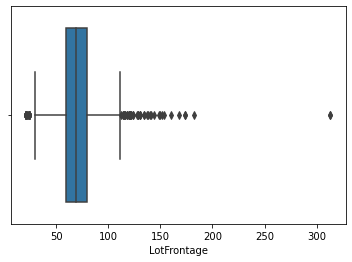

In [86]:
sns.boxplot('LotFrontage',data = data)
plt.show()

In [87]:
def end_of_dist_impute(df, variable, median, extreme):
    extreme = data.LotFrontage.mean()+3*data.LotFrontage.std()
    df[variable+'_end_distribution'] = df[variable].fillna(extreme)
    df[variable].fillna(median, inplace = True)

In [88]:
end_of_dist_impute(data, 'LotFrontage', data.LotFrontage.median(), extreme)

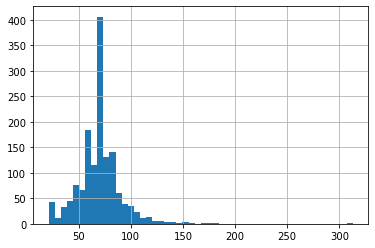

In [89]:
data['LotFrontage'].hist(bins = 50)
plt.show()

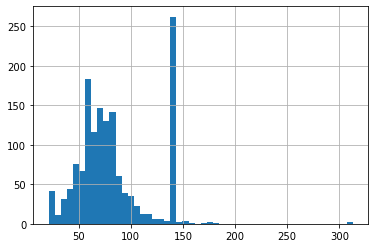

In [90]:
data['LotFrontage_end_distribution'].hist(bins = 50)
plt.show()

C:\Users\shara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotFrontage_end_distribution'>

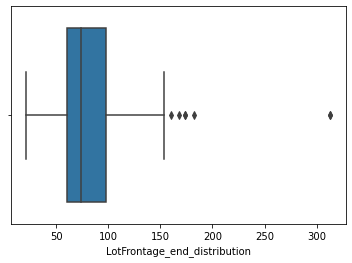

In [91]:
sns.boxplot('LotFrontage_end_distribution', data = data)

# Filling  Missing Values with a Regression Model

In this case, the null values in one column are filled by fitting a regression model using other columns in the dataset.

I.E in this case the regression model will contain all the columns except Age in X and Age in Y.

One smart way of doing this could be training a classifier over your columns with missing values as a dependent variable against other features of your data set and trying to impute based on the newly trained classifier.

Note : Before applying regression model to predict missing values of a particular feature, we must make sure that the independent features involved in predicting must all be numeric values, i.e, carry out encoding of categorical variables. 

In [92]:
# Filtering or dropping all the features with object datatype

data = df[[feature for feature in df.columns if df[feature].dtype != 'O']]

# Dropping features with missing values except LotFrontage

drop_features = [feature for feature in data.columns if df[feature].isnull().sum()>1]
data = data.drop(drop_features[1:], axis = 1)
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [93]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

# Here, we divide the test and train data, test data contains all observations where there are null values to be predicted.

testdata = data[data['LotFrontage'].isnull()==True]
traindata = data[data['LotFrontage'].isnull()==False]

y = traindata['LotFrontage']

traindata.drop("LotFrontage", axis = 1, inplace=True)

lin_reg.fit(traindata, y)

testdata.drop('LotFrontage', axis= 1, inplace=True)

pred = lin_reg.predict(testdata)

testdata['LotFrontage'] = pred


C:\Users\shara\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\shara\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\shara\AppData\Local\Temp/ipykernel_33012/1923118254.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

In [94]:
# These are the missing values that are predicted using a regression model

testdata.head(20)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotFrontage
7,8,60,10382,7,6,1973,1973,859,32,216,...,204,228,0,0,0,350,11,2009,200000,80.754412
12,13,20,12968,5,6,1962,1962,737,0,175,...,0,0,0,176,0,0,9,2008,144000,64.722744
14,15,20,10920,6,5,1960,1960,733,0,520,...,213,176,0,0,0,0,5,2008,157000,79.141340
16,17,20,11241,6,7,1970,1970,578,0,426,...,0,0,0,0,0,700,3,2010,149000,73.319209
24,25,20,8246,5,8,1968,2001,188,668,204,...,90,0,0,0,0,0,5,2010,154000,68.113409
31,32,20,8544,5,6,1966,2006,0,0,1228,...,65,0,0,0,0,0,6,2008,149350,71.344683
42,43,85,9180,5,7,1983,1983,747,93,0,...,0,0,0,0,0,0,12,2007,144000,54.206593
43,44,20,9200,5,6,1975,1980,280,491,167,...,0,0,0,0,0,0,7,2008,130250,67.706488
50,51,60,13869,6,6,1997,1997,182,0,612,...,75,0,0,0,0,0,7,2007,177000,67.476037
64,65,60,9375,7,5,1997,1998,739,0,318,...,36,0,0,0,0,0,2,2009,219500,70.141731


# Outliers

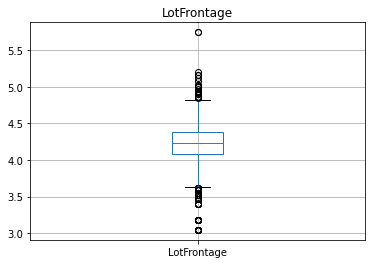

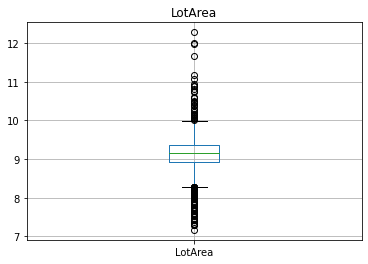

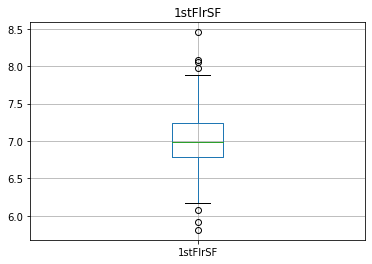

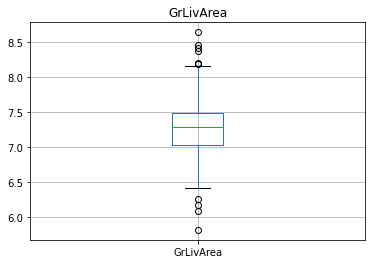

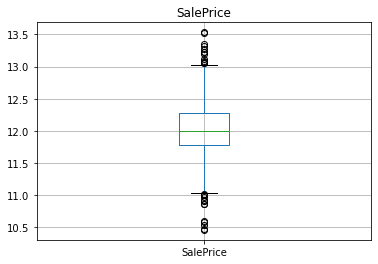

In [95]:
# Finding the outliers after log transform
# Log Transformation is done to convert the distribution of a feature into normal distribution 

for feature in continuous_features:
    data  = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column=feature)
        plt.title(feature)
        plt.show()

In [96]:
data = df.copy()

# Finding the InterQuartile Range

IQR = data['LotFrontage'].quantile(0.75) - data['LotFrontage'].quantile(0.25)
IQR

21.0

In [97]:
# Find the Higher and Lower Boundary 

upper_boundary = data['LotFrontage'].mean() + 3*data['LotFrontage'].std()
lower_boundary = data['LotFrontage'].mean() - 3*data['LotFrontage'].std()

In [98]:
print(lower_boundary, upper_boundary, data['LotFrontage'].mean())

-2.804296955422899 142.9042136914762 70.04995836802665


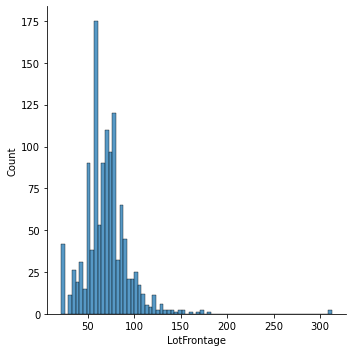

In [99]:
sns.displot(data['LotFrontage'].dropna())
plt.show()

# Detection using Z - Score

Formula for Z-Score = (Observation — Mean)/Standard Deviation

z = (X — μ) / σ

In [100]:
def detect_outliers(df, threshold):
    
    outliers = [] 
    mean = np.mean(df)
    std = np.std(df)
    
    for i in df:
        z_score = (i - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

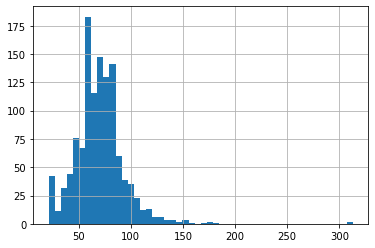

In [101]:
# Detecting outliers in LotFrontage

data = df.copy()
data['LotFrontage'].hist(bins = 50)
plt.show()

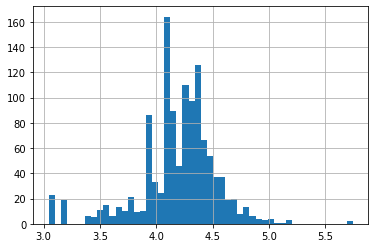

In [102]:
# The distribution is not normal and is skewed, hence a transformation must be done to make it normal

# Using log transformation

data['LotFrontage'] = np.log(data['LotFrontage'])
data['LotFrontage'].hist(bins = 50)
plt.show()

In [103]:
outliers_pts = detect_outliers(data['LotFrontage'], 3)
outliers_pts

[3.044522437723423,
 3.044522437723423,
 3.044522437723423,
 3.044522437723423,
 3.044522437723423,
 3.044522437723423,
 3.044522437723423,
 3.044522437723423,
 3.044522437723423,
 3.044522437723423,
 3.044522437723423,
 3.044522437723423,
 3.044522437723423,
 3.044522437723423,
 3.044522437723423,
 5.746203190540153,
 3.044522437723423,
 3.044522437723423,
 3.044522437723423,
 3.044522437723423,
 3.044522437723423,
 3.044522437723423,
 5.746203190540153,
 3.044522437723423,
 3.044522437723423]

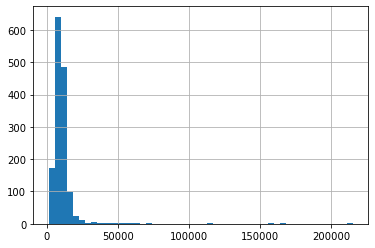

In [104]:
# Detecting outliers in LotArea

data = df.copy()
data['LotArea'].hist(bins = 50)
plt.show()

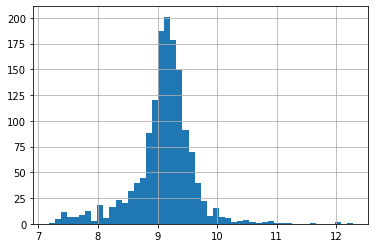

In [105]:
data['LotArea'] = np.log(data['LotArea'])
data['LotArea'].hist(bins = 50)
plt.show()

In [106]:
outliers_pts = detect_outliers(data['LotArea'], 3)
sorted(outliers_pts)

[7.170119543449628,
 7.29776828253138,
 7.307202314764738,
 7.330405211844402,
 7.334981878871814,
 7.334981878871814,
 7.3752557780097545,
 7.426549072397305,
 7.426549072397305,
 7.426549072397305,
 7.426549072397305,
 7.426549072397305,
 7.426549072397305,
 7.426549072397305,
 7.426549072397305,
 7.426549072397305,
 7.426549072397305,
 7.533158807455563,
 7.5443321080536885,
 7.5443321080536885,
 10.727662995502477,
 10.74911974074705,
 10.825183649068833,
 10.880064025283644,
 10.882321065382621,
 10.887511696444374,
 10.95430917736789,
 11.064871176788817,
 11.167063280451986,
 11.653982220886329,
 11.976659481202368,
 12.011638020852416,
 12.279532193216468]

# Detecting Outliers using Inter Quartile Range (IQR)

Steps:
1. Sort the dataset in ascending order
2. Calculate the 1st and 3rd quartiles(Q1, Q3)
3. Compute IQR=Q3-Q1
4. Compute lower bound = (Q1–1.5*IQR), upper bound = (Q3+1.5*IQR)
5. Loop through the values of the dataset and check for those who fall below the lower bound and above the upper bound and mark them as outliers

In [107]:
def detect_outliers_iqr(df):
    
    outliers = []
    
    df = sorted(df)
    
    q1 = np.percentile(df, 25)
    q3 = np.percentile(df, 75)
    
    IQR = q3 - q1
    
    lower_bound = q1-(1.5*IQR)
    upper_bound = q3+(1.5*IQR)
    
    for i in df:
        if(i<lower_bound or i>upper_bound):
            outliers.append(i)
    return outliers

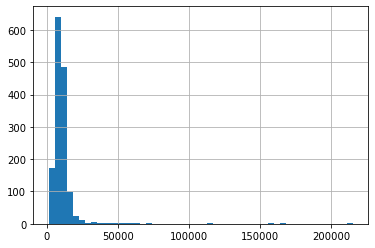

In [108]:
# Detecting outliers in LotArea

data = df.copy()
data['LotArea'].hist(bins = 50)
plt.show()

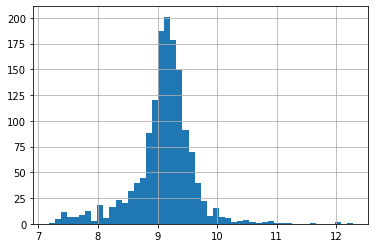

In [109]:
data['LotArea'] = np.log(data['LotArea'])
data['LotArea'].hist(bins = 50)
plt.show()

In [110]:
outlier_pts = detect_outliers_iqr(data['LotArea'])
outlier_pts

[7.170119543449628,
 7.29776828253138,
 7.307202314764738,
 7.330405211844402,
 7.334981878871814,
 7.334981878871814,
 7.3752557780097545,
 7.426549072397305,
 7.426549072397305,
 7.426549072397305,
 7.426549072397305,
 7.426549072397305,
 7.426549072397305,
 7.426549072397305,
 7.426549072397305,
 7.426549072397305,
 7.426549072397305,
 7.533158807455563,
 7.5443321080536885,
 7.5443321080536885,
 7.560080465021827,
 7.568379267836522,
 7.575584651557793,
 7.577121930876679,
 7.587817219993427,
 7.601402334583733,
 7.60887062919126,
 7.6577552711348655,
 7.6577552711348655,
 7.6577552711348655,
 7.67786350067821,
 7.7039102096163115,
 7.7266536648476425,
 7.731930721948486,
 7.731930721948486,
 7.731930721948486,
 7.735870319952567,
 7.744136627627991,
 7.744136627627991,
 7.769800996003896,
 7.803026643632217,
 7.824046010856292,
 7.8328075165248645,
 7.8328075165248645,
 7.8328075165248645,
 7.841492924460013,
 7.85243908535751,
 7.860185057472165,
 7.873978379604501,
 7.8804263442

# Detecting outliers using DBSCAN Algorithm

The most exciting feature of DBSCAN clustering is that it is robust to outliers. It also does not require the number of clusters to be told beforehand, unlike K-Means, where we have to specify the number of centroids.

DBSCAN requires only two parameters: epsilon and minPoints. Epsilon is the radius of the circle to be created around each data point to check the density and minPoints is the minimum number of data points required inside that circle for that data point to be classified as a Core point.

DBSCAN creates a circle of epsilon radius around every data point and classifies them into Core point, Border point, and Noise. A data point is a Core point if the circle around it contains at least ‘minPoints’ number of points*. *If the number of points is less than minPoints, then it is classified as Border Point, and if there are no other data points around any data point within epsilon radius, then it treated as Noise.

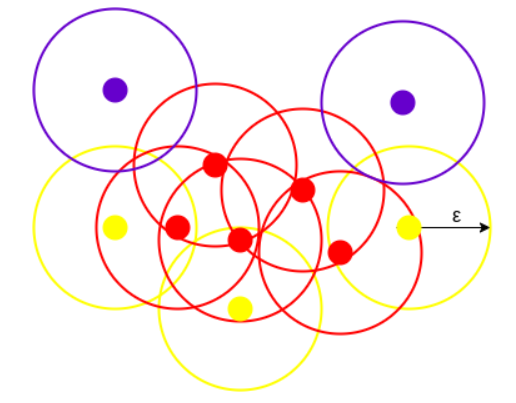

The above figure shows us a cluster created by DBCAN with minPoints = 3. Here, we draw a circle of equal radius epsilon around every data point. These two parameters help in creating spatial clusters.

All the data points with at least 3 points in the circle including itself are considered as Core points represented by red color.

All the data points with less than 3 but greater than 1 point in the circle including itself are considered as Border points. They are represented by yellow color.

Finally, data points with no point other than itself present inside the circle are considered as Noise represented by the purple color.

For locating data points in space, DBSCAN uses Euclidean distance, although other methods can also be used (like great circle distance for geographical data). It also needs to scan through the entire dataset once, whereas in other algorithms we have to do it multiple times.

Dbscan pros:

It is a super effective method when the distribution of values in the feature space can not be assumed. Works well if the feature space for searching outliers is multidimensional (ie. 3 or more dimensions) Sci-kit learn’s implementation is easy to use and the documentation is superb. Visualizing the results is easy and the method itself is very intuitive.

Dbscan cons: 

The values in the feature space need to be scaled accordingly. Selecting the optimal parameters eps, MinPts and metric can be difficult since it is very sensitive to any of the three params. It is an unsupervised model and needs to be re-calibrated each time a new batch of data is analyzed. It can predict once calibrated but is strongly not recommended.

In [111]:
from sklearn.cluster import DBSCAN

data = df.copy()

# Replacing all the missing values with median values

median_value = data['LotFrontage'].median()
data['LotFrontage'].fillna(median_value, inplace=True)

In [112]:
dbscan = DBSCAN()
model = dbscan.fit(data[['LotFrontage', 'LotArea']])

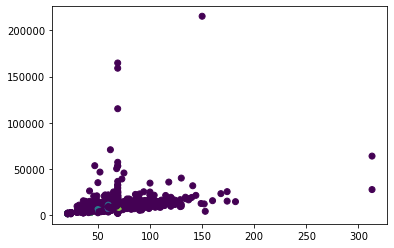

In [113]:
# Visualizing outputs

colors = model.labels_
plt.scatter(data['LotFrontage'], data['LotArea'], c = colors)
plt.show()

In [114]:
from sklearn.neighbors import NearestNeighbors

neighbour = NearestNeighbors(n_neighbors=2)
neigh_model = neighbour.fit(data[['LotFrontage', 'LotArea']])
distances, indices = neigh_model.kneighbors(data[['LotFrontage', 'LotArea']])

In [115]:
distances, indices

(array([[ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  1.        ],
        ...,
        [ 0.        ,  5.38516481],
        [ 0.        , 18.68154169],
        [ 0.        ,  0.        ]]),
 array([[   0,  742],
        [ 294,  849],
        [   2,  983],
        ...,
        [1457, 1239],
        [1458, 1379],
        [1459,  659]], dtype=int64))

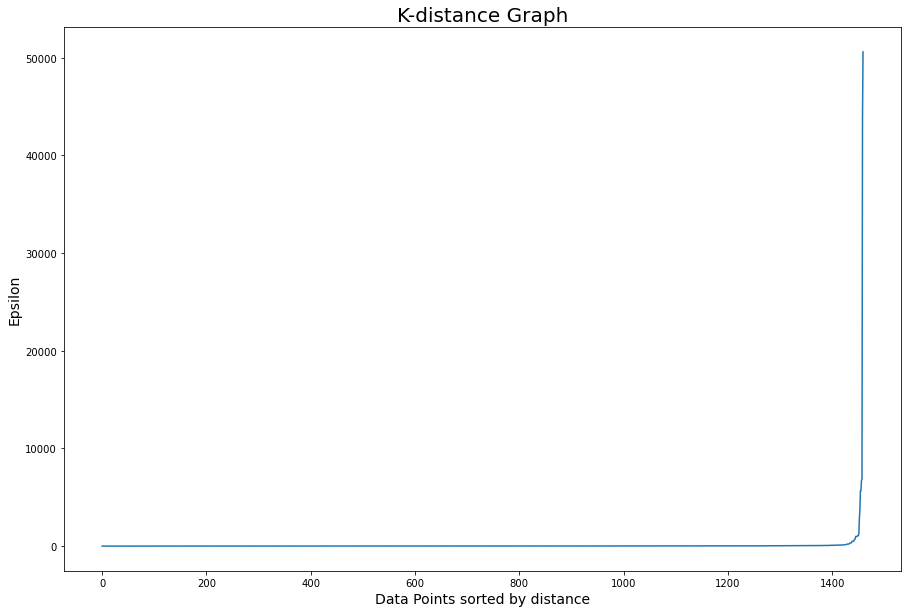

In [116]:
# Plotting the K-distance Graph

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [117]:
# Input Data

data = data[['LotFrontage', 'LotArea']]
model = DBSCAN(eps = 50000, min_samples=10).fit(data)

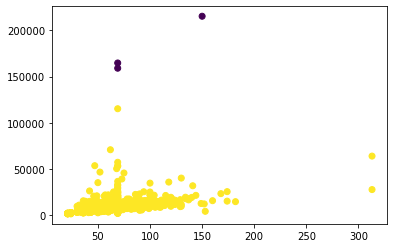

In [118]:
# Visualize Outputs

colors = model.labels_
plt.scatter(data['LotFrontage'], data['LotArea'], c=colors)
plt.show()

In [119]:
# Outliers DataFrame

outliers = data[model.labels_ == -1]
print(outliers)

     LotFrontage  LotArea
249         69.0   159000
313        150.0   215245
335         69.0   164660


# Using Local Outlier Factor (LOF)

The anomaly score of each sample is called Local Outlier Factor. It measures the local deviation of density of a given sample with respect to its neighbors. The anomaly score depends on how isolated the object is with respect to the surrounding neighborhood. More precisely, locality is given by k-nearest neighbors, whose distance is used to estimate the local density. By comparing the local density of a sample to the local densities of its neighbors, one can identify samples that have a substantially lower density than their neighbors. These are considered outliers.

In [120]:
data = df.copy()

# Replacing all the missing values with median values

median_value = data['LotFrontage'].median()
data['LotFrontage'].fillna(median_value, inplace=True)

In [121]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=20)
X = data[['LotFrontage', 'LotArea']]

y_pred = clf.fit_predict(X)

In [122]:
pd.DataFrame(y_pred).value_counts()

 1    1389
-1      71
dtype: int64

# Anomaly or Outlier Detection using Algorithms

1. Cluster based anomaly detection (K-mean)
2. Repartition of data into categories then Gaussian/Elliptic Enveloppe on each categories separately
3. Markov Chain
4. Isolation Forest
5. One class SVM
6. RNN (comparison between prediction and reality)

# Cluster based anomaly detection (K-mean)

Use for collective anomalies (unordered).
We group together the usual combination of features. The points that are far from the cluster are points with usual combination of features. We consider those points as anomalies.

In [123]:
# Preprocessing the Data

data_new = df[numerical_features].copy()

# Filling all NaN values 

for feature in data_new.columns:
    if data_new[feature].isnull().sum()>0:
        median_value = data_new[feature].median()
        data_new[feature].fillna(median_value, inplace = True)
    else:
        pass

data_new.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [124]:
# Standardize the features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_new_scl = scaler.fit_transform(data_new)
data_new_scl = pd.DataFrame(data_new_scl)
data_new_scl.columns = data_new.columns
data_new_scl = data_new_scl.drop('Id', axis =1)
data_new_scl.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,...,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.347273
1,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,...,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.007288
2,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,...,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.536154
3,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,...,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.515281
4,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,...,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.869843


# Using elbow method to find the number of clusters

C:\Users\shara\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


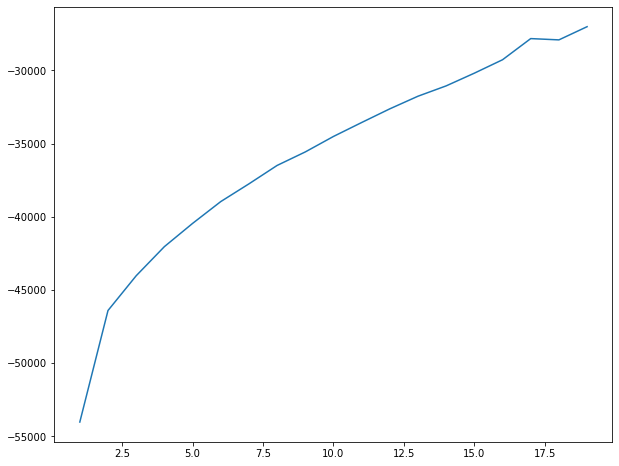

In [125]:
from sklearn.cluster import KMeans

n_cluster = range(1,20)
kmeans = [KMeans(n_clusters=i).fit(data_new_scl) for i in n_cluster]
scores = [kmeans[i].score(data_new_scl) for i in range(len(kmeans))]
plt.figure(figsize=(10,8))
plt.plot(n_cluster, scores)
plt.show()

In [126]:
kmeans

[KMeans(n_clusters=1),
 KMeans(n_clusters=2),
 KMeans(n_clusters=3),
 KMeans(n_clusters=4),
 KMeans(n_clusters=5),
 KMeans(n_clusters=6),
 KMeans(n_clusters=7),
 KMeans(),
 KMeans(n_clusters=9),
 KMeans(n_clusters=10),
 KMeans(n_clusters=11),
 KMeans(n_clusters=12),
 KMeans(n_clusters=13),
 KMeans(n_clusters=14),
 KMeans(n_clusters=15),
 KMeans(n_clusters=16),
 KMeans(n_clusters=17),
 KMeans(n_clusters=18),
 KMeans(n_clusters=19)]

In [127]:
data_new_scl.iloc[:,1]

0      -0.220875
1       0.460320
2      -0.084636
3      -0.447940
4       0.641972
          ...   
1455   -0.357114
1456    0.687385
1457   -0.175462
1458   -0.084636
1459    0.233255
Name: LotFrontage, Length: 1460, dtype: float64

In [128]:
# Arbitarily choosing 15 clusters

data_cluster = pd.DataFrame()

data_cluster['cluster'] = kmeans[14].predict(data_new_scl)
data_cluster['principle_feature1'] = data_new_scl.iloc[:,1]
data_cluster['principle_feature2'] = data_new_scl.iloc[:,5]
data_cluster['cluster'].value_counts()

4     249
9     211
3     205
7     136
1     136
5     118
11    107
8      84
2      70
0      62
14     55
10     16
13      6
6       4
12      1
Name: cluster, dtype: int64

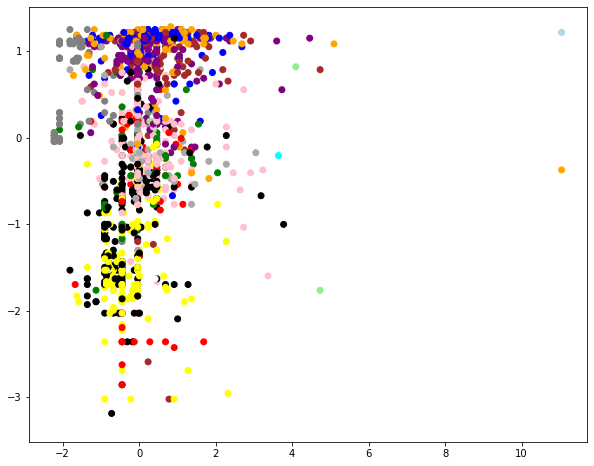

In [129]:
# Plotting the different clusters with two main features

plt.figure(figsize=(10,8))
colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'black', 5:'orange', 6:'cyan', 7:'yellow', 8:'brown',
          9:'purple', 10:'white', 11: 'grey', 12:'lightblue', 13:'lightgreen', 14: 'darkgrey'}

plt.scatter(data_cluster['principle_feature1'], data_cluster['principle_feature2'], c= data_cluster['cluster'].apply(lambda x: 
                                                                                                                    colors[x]))
plt.show()

# Feature Transformation On Numerical Variables

Since the numerical variables are skewed we will perform log normal distribution

In [133]:
# Remember: For performing log normal distribution take only those continuous variables which does not have the value zero
# This can also be found out by the histograms plotted in continous variables

num_features_without_zero = []
for feature in continuous_features:
    if 0 in df[feature].unique():
        pass
    else:
        num_features_without_zero.append(feature)
print(num_features_without_zero)

['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']


In [134]:
for feature in num_features_without_zero:
    df[feature] = np.log(df[feature])

In [135]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,4.174387,9.041922,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,12.247694
1,2,20,RL,4.382027,9.169518,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,12.109011
2,3,60,RL,4.219508,9.328123,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,12.317167
3,4,70,RL,4.094345,9.164296,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,4.430817,9.565214,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,12.429216


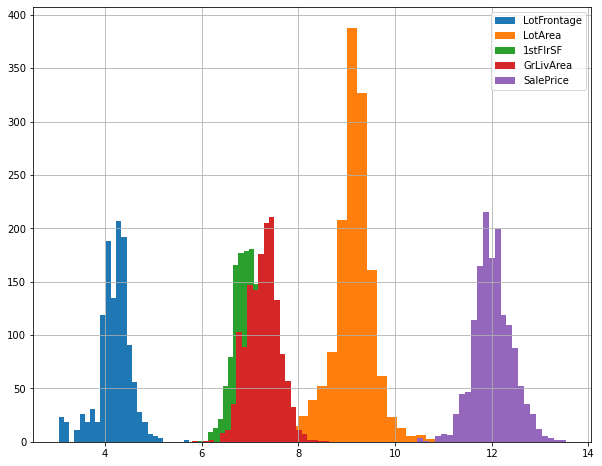

In [136]:
# Histograms after transforming

for feature in num_features_without_zero:
    df[feature].hist(bins = 25, figsize=(10,8))
    plt.legend(num_features_without_zero)